## Define the Convolutional Neural Network

After you've looked at the data you're working with and, in this case, know the shapes of the images and of the keypoints, you are ready to define a convolutional neural network that can *learn* from this data.

In this notebook and in `models.py`, you will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. And you'll see examples of this later in the notebook.

---


## PyTorch Neural Nets

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)      
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

Best practice is to place any layers whose weights will change during the training process in `__init__` and refer to them in the `forward` function; any layers or functions that always behave in the same way, such as a pre-defined activation function, should appear *only* in the `forward` function.

#### Why models.py

You are tasked with defining the network in the `models.py` file so that any models you define can be saved and loaded by name in different notebooks in this project directory. For example, by defining a CNN class called `Net` in `models.py`, you can then create that same architecture in this and other notebooks by simply importing the class and instantiating a model:
```
    from models import Net
    net = Net()
```

In [6]:
# load the data if you need to; if you have already loaded the data, you may comment this cell out
# -- DO NOT CHANGE THIS CELL -- #
!mkdir /data
!wget -P /data/ https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
!unzip /data/train-test-data.zip -d /data

mkdir: cannot create directory ‘/data’: File exists
--2018-05-09 18:45:55--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.64.211
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.64.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338613624 (323M) [application/zip]
Saving to: ‘/data/train-test-data.zip’

train-test-data.zip 100%[===================>] 322.93M  84.3MB/s    in 4.1s    

2018-05-09 18:46:00 (78.8 MB/s) - ‘/data/train-test-data.zip’ saved [338613624/338613624]

Archive:  /data/train-test-data.zip
   creating: /data/test/
  inflating: /data/test/Abdel_Aziz_Al-Hakim_00.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_01.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_10.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_11.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_40.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Ha

  inflating: /data/test/Angel_Lockward_51.jpg  
  inflating: /data/test/Angela_Bassett_20.jpg  
  inflating: /data/test/Angela_Bassett_21.jpg  
  inflating: /data/test/Angela_Bassett_30.jpg  
  inflating: /data/test/Angela_Bassett_31.jpg  
  inflating: /data/test/Angela_Bassett_40.jpg  
  inflating: /data/test/Angela_Bassett_41.jpg  
  inflating: /data/test/Angelo_Reyes_20.jpg  
  inflating: /data/test/Angelo_Reyes_21.jpg  
  inflating: /data/test/Angelo_Reyes_30.jpg  
  inflating: /data/test/Angelo_Reyes_31.jpg  
  inflating: /data/test/Angelo_Reyes_50.jpg  
  inflating: /data/test/Angelo_Reyes_51.jpg  
  inflating: /data/test/Baburam_Bhattari_00.jpg  
  inflating: /data/test/Baburam_Bhattari_01.jpg  
  inflating: /data/test/Baburam_Bhattari_20.jpg  
  inflating: /data/test/Baburam_Bhattari_21.jpg  
  inflating: /data/test/Baburam_Bhattari_30.jpg  
  inflating: /data/test/Baburam_Bhattari_31.jpg  
  inflating: /data/test/Barbara_Bodine_00.jpg  
  inflating: /data/test/Barbara_Bodine_0

  inflating: /data/test/Charlize_Theron_51.jpg  
  inflating: /data/test/Charlotte_Casiraghi_00.jpg  
  inflating: /data/test/Charlotte_Casiraghi_01.jpg  
  inflating: /data/test/Charlotte_Casiraghi_10.jpg  
  inflating: /data/test/Charlotte_Casiraghi_11.jpg  
  inflating: /data/test/Charlotte_Casiraghi_20.jpg  
  inflating: /data/test/Charlotte_Casiraghi_21.jpg  
  inflating: /data/test/Charlotte_Rampling_00.jpg  
  inflating: /data/test/Charlotte_Rampling_01.jpg  
  inflating: /data/test/Charlotte_Rampling_30.jpg  
  inflating: /data/test/Charlotte_Rampling_31.jpg  
  inflating: /data/test/Charlotte_Rampling_40.jpg  
  inflating: /data/test/Charlotte_Rampling_41.jpg  
  inflating: /data/test/Charlotte_Rampling_50.jpg  
  inflating: /data/test/Charlotte_Rampling_51.jpg  
  inflating: /data/test/Cherie_Blair_00.jpg  
  inflating: /data/test/Cherie_Blair_01.jpg  
  inflating: /data/test/Cherie_Blair_20.jpg  
  inflating: /data/test/Cherie_Blair_21.jpg  
  inflating: /data/test/Cherie_Bl

  inflating: /data/test/Daniel_Rouse_10.jpg  
  inflating: /data/test/Daniel_Rouse_11.jpg  
  inflating: /data/test/Daniel_Rouse_20.jpg  
  inflating: /data/test/Daniel_Rouse_21.jpg  
  inflating: /data/test/Daniel_Rouse_30.jpg  
  inflating: /data/test/Daniel_Rouse_31.jpg  
  inflating: /data/test/Daniell_Sunjata_10.jpg  
  inflating: /data/test/Daniell_Sunjata_11.jpg  
  inflating: /data/test/Daniell_Sunjata_20.jpg  
  inflating: /data/test/Daniell_Sunjata_21.jpg  
  inflating: /data/test/Daniell_Sunjata_40.jpg  
  inflating: /data/test/Daniell_Sunjata_41.jpg  
  inflating: /data/test/Danny_Glover_10.jpg  
  inflating: /data/test/Danny_Glover_11.jpg  
  inflating: /data/test/Danny_Glover_30.jpg  
  inflating: /data/test/Danny_Glover_31.jpg  
  inflating: /data/test/Danny_Glover_50.jpg  
  inflating: /data/test/Danny_Glover_51.jpg  
  inflating: /data/test/Darrell_Issa_00.jpg  
  inflating: /data/test/Darrell_Issa_01.jpg  
  inflating: /data/test/Darrell_Issa_20.jpg  
  inflating: /da

  inflating: /data/test/Ernie_Grunfeld_51.jpg  
  inflating: /data/test/Estelle_Morris_10.jpg  
  inflating: /data/test/Estelle_Morris_11.jpg  
  inflating: /data/test/Estelle_Morris_20.jpg  
  inflating: /data/test/Estelle_Morris_21.jpg  
  inflating: /data/test/Estelle_Morris_30.jpg  
  inflating: /data/test/Estelle_Morris_31.jpg  
  inflating: /data/test/Ethan_Hawke_00.jpg  
  inflating: /data/test/Ethan_Hawke_01.jpg  
  inflating: /data/test/Ethan_Hawke_10.jpg  
  inflating: /data/test/Ethan_Hawke_11.jpg  
  inflating: /data/test/Ethan_Hawke_30.jpg  
  inflating: /data/test/Ethan_Hawke_31.jpg  
  inflating: /data/test/Ethan_Hawke_40.jpg  
  inflating: /data/test/Ethan_Hawke_41.jpg  
  inflating: /data/test/Eunice_Barber_00.jpg  
  inflating: /data/test/Eunice_Barber_01.jpg  
  inflating: /data/test/Eunice_Barber_10.jpg  
  inflating: /data/test/Eunice_Barber_11.jpg  
  inflating: /data/test/Eunice_Barber_50.jpg  
  inflating: /data/test/Eunice_Barber_51.jpg  
  inflating: /data/tes

  inflating: /data/test/Jacqueline_Gold_31.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_00.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_01.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_20.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_21.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_30.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_31.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_50.jpg  
  inflating: /data/test/Jafar_Umar_Thalib_51.jpg  
  inflating: /data/test/Jaime_Pressly_00.jpg  
  inflating: /data/test/Jaime_Pressly_01.jpg  
  inflating: /data/test/Jaime_Pressly_10.jpg  
  inflating: /data/test/Jaime_Pressly_11.jpg  
  inflating: /data/test/Jaime_Pressly_40.jpg  
  inflating: /data/test/Jaime_Pressly_41.jpg  
  inflating: /data/test/Jake_Gyllenhaal_00.jpg  
  inflating: /data/test/Jake_Gyllenhaal_01.jpg  
  inflating: /data/test/Jake_Gyllenhaal_40.jpg  
  inflating: /data/test/Jake_Gyllenhaal_41.jpg  
  inflating: /data/test/Jake_Gyllenhaal_50.jpg  
  inflating: /da

  inflating: /data/test/Kweisi_Mfume_11.jpg  
  inflating: /data/test/Kweisi_Mfume_40.jpg  
  inflating: /data/test/Kweisi_Mfume_41.jpg  
  inflating: /data/test/Kweisi_Mfume_50.jpg  
  inflating: /data/test/Kweisi_Mfume_51.jpg  
  inflating: /data/test/Kyle_Shewfelt_00.jpg  
  inflating: /data/test/Kyle_Shewfelt_01.jpg  
  inflating: /data/test/Kyle_Shewfelt_10.jpg  
  inflating: /data/test/Kyle_Shewfelt_11.jpg  
  inflating: /data/test/Kyle_Shewfelt_20.jpg  
  inflating: /data/test/Kyle_Shewfelt_21.jpg  
  inflating: /data/test/Kyle_Shewfelt_40.jpg  
  inflating: /data/test/Kyle_Shewfelt_41.jpg  
  inflating: /data/test/Larry_Flynt_00.jpg  
  inflating: /data/test/Larry_Flynt_01.jpg  
  inflating: /data/test/Larry_Flynt_10.jpg  
  inflating: /data/test/Larry_Flynt_11.jpg  
  inflating: /data/test/Larry_Flynt_20.jpg  
  inflating: /data/test/Larry_Flynt_21.jpg  
  inflating: /data/test/Laura_Bozzo_00.jpg  
  inflating: /data/test/Laura_Bozzo_01.jpg  
  inflating: /data/test/Laura_Bozz

  inflating: /data/test/Maggie_Cheung_01.jpg  
  inflating: /data/test/Maggie_Cheung_30.jpg  
  inflating: /data/test/Maggie_Cheung_31.jpg  
  inflating: /data/test/Maggie_Cheung_50.jpg  
  inflating: /data/test/Maggie_Cheung_51.jpg  
  inflating: /data/test/Maggie_Smith_00.jpg  
  inflating: /data/test/Maggie_Smith_01.jpg  
  inflating: /data/test/Maggie_Smith_30.jpg  
  inflating: /data/test/Maggie_Smith_31.jpg  
  inflating: /data/test/Maggie_Smith_40.jpg  
  inflating: /data/test/Maggie_Smith_41.jpg  
  inflating: /data/test/Mahathir_Mohamad_00.jpg  
  inflating: /data/test/Mahathir_Mohamad_01.jpg  
  inflating: /data/test/Mahathir_Mohamad_10.jpg  
  inflating: /data/test/Mahathir_Mohamad_11.jpg  
  inflating: /data/test/Mahathir_Mohamad_20.jpg  
  inflating: /data/test/Mahathir_Mohamad_21.jpg  
  inflating: /data/test/Mahathir_Mohamad_30.jpg  
  inflating: /data/test/Mahathir_Mohamad_31.jpg  
  inflating: /data/test/Malcolm_Jamal_Warner_00.jpg  
  inflating: /data/test/Malcolm_Jam

  inflating: /data/test/Norah_Jones_51.jpg  
  inflating: /data/test/Norman_Mineta_00.jpg  
  inflating: /data/test/Norman_Mineta_01.jpg  
  inflating: /data/test/Norman_Mineta_30.jpg  
  inflating: /data/test/Norman_Mineta_31.jpg  
  inflating: /data/test/Norman_Mineta_50.jpg  
  inflating: /data/test/Norman_Mineta_51.jpg  
  inflating: /data/test/Olene_Walker_00.jpg  
  inflating: /data/test/Olene_Walker_01.jpg  
  inflating: /data/test/Olene_Walker_10.jpg  
  inflating: /data/test/Olene_Walker_11.jpg  
  inflating: /data/test/Olene_Walker_30.jpg  
  inflating: /data/test/Olene_Walker_31.jpg  
  inflating: /data/test/Olene_Walker_40.jpg  
  inflating: /data/test/Olene_Walker_41.jpg  
  inflating: /data/test/Olivia_Newton-John_00.jpg  
  inflating: /data/test/Olivia_Newton-John_01.jpg  
  inflating: /data/test/Olivia_Newton-John_10.jpg  
  inflating: /data/test/Olivia_Newton-John_11.jpg  
  inflating: /data/test/Olivia_Newton-John_40.jpg  
  inflating: /data/test/Olivia_Newton-John_41

  inflating: /data/test/Richard_Lugar_21.jpg  
  inflating: /data/test/Richard_Lugar_50.jpg  
  inflating: /data/test/Richard_Lugar_51.jpg  
  inflating: /data/test/Richard_Paul_Evans_00.jpg  
  inflating: /data/test/Richard_Paul_Evans_01.jpg  
  inflating: /data/test/Richard_Paul_Evans_20.jpg  
  inflating: /data/test/Richard_Paul_Evans_21.jpg  
  inflating: /data/test/Richard_Paul_Evans_40.jpg  
  inflating: /data/test/Richard_Paul_Evans_41.jpg  
  inflating: /data/test/Richard_Paul_Evans_50.jpg  
  inflating: /data/test/Richard_Paul_Evans_51.jpg  
  inflating: /data/test/Rick_Bragg_20.jpg  
  inflating: /data/test/Rick_Bragg_21.jpg  
  inflating: /data/test/Rick_Bragg_30.jpg  
  inflating: /data/test/Rick_Bragg_31.jpg  
  inflating: /data/test/Rick_Bragg_50.jpg  
  inflating: /data/test/Rick_Bragg_51.jpg  
  inflating: /data/test/Ridley_Scott_10.jpg  
  inflating: /data/test/Ridley_Scott_11.jpg  
  inflating: /data/test/Ridley_Scott_20.jpg  
  inflating: /data/test/Ridley_Scott_21.j

  inflating: /data/test/Tom_Ridge_50.jpg  
  inflating: /data/test/Tom_Ridge_51.jpg  
  inflating: /data/test/Tom_Sizemore_00.jpg  
  inflating: /data/test/Tom_Sizemore_01.jpg  
  inflating: /data/test/Tom_Sizemore_10.jpg  
  inflating: /data/test/Tom_Sizemore_11.jpg  
  inflating: /data/test/Tom_Sizemore_20.jpg  
  inflating: /data/test/Tom_Sizemore_21.jpg  
  inflating: /data/test/Valerie_Harper_00.jpg  
  inflating: /data/test/Valerie_Harper_01.jpg  
  inflating: /data/test/Valerie_Harper_30.jpg  
  inflating: /data/test/Valerie_Harper_31.jpg  
  inflating: /data/test/Valerie_Harper_40.jpg  
  inflating: /data/test/Valerie_Harper_41.jpg  
  inflating: /data/test/Valerie_Harper_50.jpg  
  inflating: /data/test/Valerie_Harper_51.jpg  
  inflating: /data/test/Vicente_Fox_10.jpg  
  inflating: /data/test/Vicente_Fox_11.jpg  
  inflating: /data/test/Vicente_Fox_20.jpg  
  inflating: /data/test/Vicente_Fox_21.jpg  
  inflating: /data/test/Vicente_Fox_30.jpg  
  inflating: /data/test/Vicen

  inflating: /data/training/Ahmed_Ahmed_00.jpg  
  inflating: /data/training/Ahmed_Ahmed_01.jpg  
  inflating: /data/training/Ahmed_Ahmed_02.jpg  
  inflating: /data/training/Ahmed_Ahmed_10.jpg  
  inflating: /data/training/Ahmed_Ahmed_11.jpg  
  inflating: /data/training/Ahmed_Ahmed_12.jpg  
  inflating: /data/training/Ahmed_Ahmed_40.jpg  
  inflating: /data/training/Ahmed_Ahmed_41.jpg  
  inflating: /data/training/Ahmed_Ahmed_42.jpg  
  inflating: /data/training/Ahmed_Ahmed_50.jpg  
  inflating: /data/training/Ahmed_Ahmed_51.jpg  
  inflating: /data/training/Ahmed_Ahmed_52.jpg  
  inflating: /data/training/Aidan_Quinn_00.jpg  
  inflating: /data/training/Aidan_Quinn_01.jpg  
  inflating: /data/training/Aidan_Quinn_02.jpg  
  inflating: /data/training/Aidan_Quinn_10.jpg  
  inflating: /data/training/Aidan_Quinn_11.jpg  
  inflating: /data/training/Aidan_Quinn_12.jpg  
  inflating: /data/training/Aidan_Quinn_20.jpg  
  inflating: /data/training/Aidan_Quinn_21.jpg  
  inflating: /data/t

  inflating: /data/training/Angelo_Reyes_31.jpg  
  inflating: /data/training/Angelo_Reyes_32.jpg  
  inflating: /data/training/Angelo_Reyes_50.jpg  
  inflating: /data/training/Angelo_Reyes_51.jpg  
  inflating: /data/training/Angelo_Reyes_52.jpg  
  inflating: /data/training/Baburam_Bhattari_00.jpg  
  inflating: /data/training/Baburam_Bhattari_01.jpg  
  inflating: /data/training/Baburam_Bhattari_02.jpg  
  inflating: /data/training/Baburam_Bhattari_20.jpg  
  inflating: /data/training/Baburam_Bhattari_21.jpg  
  inflating: /data/training/Baburam_Bhattari_22.jpg  
  inflating: /data/training/Baburam_Bhattari_30.jpg  
  inflating: /data/training/Baburam_Bhattari_31.jpg  
  inflating: /data/training/Baburam_Bhattari_32.jpg  
  inflating: /data/training/Barbara_Bodine_00.jpg  
  inflating: /data/training/Barbara_Bodine_01.jpg  
  inflating: /data/training/Barbara_Bodine_02.jpg  
  inflating: /data/training/Barbara_Bodine_20.jpg  
  inflating: /data/training/Barbara_Bodine_21.jpg  
  in

  inflating: /data/training/Carlos_Queiroz_11.jpg  
  inflating: /data/training/Carlos_Queiroz_12.jpg  
  inflating: /data/training/Carlos_Queiroz_50.jpg  
  inflating: /data/training/Carlos_Queiroz_51.jpg  
  inflating: /data/training/Carlos_Queiroz_52.jpg  
  inflating: /data/training/Carrie-Anne_Moss_00.jpg  
  inflating: /data/training/Carrie-Anne_Moss_01.jpg  
  inflating: /data/training/Carrie-Anne_Moss_02.jpg  
  inflating: /data/training/Carrie-Anne_Moss_10.jpg  
  inflating: /data/training/Carrie-Anne_Moss_11.jpg  
  inflating: /data/training/Carrie-Anne_Moss_12.jpg  
  inflating: /data/training/Carrie-Anne_Moss_50.jpg  
  inflating: /data/training/Carrie-Anne_Moss_51.jpg  
  inflating: /data/training/Carrie-Anne_Moss_52.jpg  
  inflating: /data/training/Catriona_Le_May_Doan_10.jpg  
  inflating: /data/training/Catriona_Le_May_Doan_11.jpg  
  inflating: /data/training/Catriona_Le_May_Doan_12.jpg  
  inflating: /data/training/Catriona_Le_May_Doan_30.jpg  
  inflating: /data/tra

  inflating: /data/training/Chuck_Hagel_32.jpg  
  inflating: /data/training/Chuck_Hagel_40.jpg  
  inflating: /data/training/Chuck_Hagel_41.jpg  
  inflating: /data/training/Chuck_Hagel_42.jpg  
  inflating: /data/training/Chuck_Hagel_50.jpg  
  inflating: /data/training/Chuck_Hagel_51.jpg  
  inflating: /data/training/Chuck_Hagel_52.jpg  
  inflating: /data/training/Chuck_Woolery_10.jpg  
  inflating: /data/training/Chuck_Woolery_11.jpg  
  inflating: /data/training/Chuck_Woolery_12.jpg  
  inflating: /data/training/Chuck_Woolery_20.jpg  
  inflating: /data/training/Chuck_Woolery_21.jpg  
  inflating: /data/training/Chuck_Woolery_22.jpg  
  inflating: /data/training/Chuck_Woolery_40.jpg  
  inflating: /data/training/Chuck_Woolery_41.jpg  
  inflating: /data/training/Chuck_Woolery_42.jpg  
  inflating: /data/training/Cindy_Crawford_00.jpg  
  inflating: /data/training/Cindy_Crawford_01.jpg  
  inflating: /data/training/Cindy_Crawford_02.jpg  
  inflating: /data/training/Cindy_Crawford

  inflating: /data/training/Daniell_Sunjata_40.jpg  
  inflating: /data/training/Daniell_Sunjata_41.jpg  
  inflating: /data/training/Daniell_Sunjata_42.jpg  
  inflating: /data/training/Danny_Glover_10.jpg  
  inflating: /data/training/Danny_Glover_11.jpg  
  inflating: /data/training/Danny_Glover_12.jpg  
  inflating: /data/training/Danny_Glover_30.jpg  
  inflating: /data/training/Danny_Glover_31.jpg  
  inflating: /data/training/Danny_Glover_32.jpg  
  inflating: /data/training/Danny_Glover_50.jpg  
  inflating: /data/training/Danny_Glover_51.jpg  
  inflating: /data/training/Danny_Glover_52.jpg  
  inflating: /data/training/Darrell_Issa_00.jpg  
  inflating: /data/training/Darrell_Issa_01.jpg  
  inflating: /data/training/Darrell_Issa_02.jpg  
  inflating: /data/training/Darrell_Issa_20.jpg  
  inflating: /data/training/Darrell_Issa_21.jpg  
  inflating: /data/training/Darrell_Issa_22.jpg  
  inflating: /data/training/Darrell_Issa_30.jpg  
  inflating: /data/training/Darrell_Issa_

  inflating: /data/training/Emile_Lahoud_30.jpg  
  inflating: /data/training/Emile_Lahoud_31.jpg  
  inflating: /data/training/Emile_Lahoud_32.jpg  
  inflating: /data/training/Emile_Lahoud_40.jpg  
  inflating: /data/training/Emile_Lahoud_41.jpg  
  inflating: /data/training/Emile_Lahoud_42.jpg  
  inflating: /data/training/Emilio_Botin_00.jpg  
  inflating: /data/training/Emilio_Botin_01.jpg  
  inflating: /data/training/Emilio_Botin_02.jpg  
  inflating: /data/training/Emilio_Botin_10.jpg  
  inflating: /data/training/Emilio_Botin_11.jpg  
  inflating: /data/training/Emilio_Botin_12.jpg  
  inflating: /data/training/Emilio_Botin_20.jpg  
  inflating: /data/training/Emilio_Botin_21.jpg  
  inflating: /data/training/Emilio_Botin_22.jpg  
  inflating: /data/training/Emilio_Botin_40.jpg  
  inflating: /data/training/Emilio_Botin_41.jpg  
  inflating: /data/training/Emilio_Botin_42.jpg  
  inflating: /data/training/Emma_Nicholson_10.jpg  
  inflating: /data/training/Emma_Nicholson_11.jp

  inflating: /data/training/Franz_Fischler_00.jpg  
  inflating: /data/training/Franz_Fischler_01.jpg  
  inflating: /data/training/Franz_Fischler_02.jpg  
  inflating: /data/training/Franz_Fischler_30.jpg  
  inflating: /data/training/Franz_Fischler_31.jpg  
  inflating: /data/training/Franz_Fischler_32.jpg  
  inflating: /data/training/Franz_Fischler_40.jpg  
  inflating: /data/training/Franz_Fischler_41.jpg  
  inflating: /data/training/Franz_Fischler_42.jpg  
  inflating: /data/training/Franz_Fischler_50.jpg  
  inflating: /data/training/Franz_Fischler_51.jpg  
  inflating: /data/training/Franz_Fischler_52.jpg  
  inflating: /data/training/Gabi_Zimmer_00.jpg  
  inflating: /data/training/Gabi_Zimmer_01.jpg  
  inflating: /data/training/Gabi_Zimmer_02.jpg  
  inflating: /data/training/Gabi_Zimmer_10.jpg  
  inflating: /data/training/Gabi_Zimmer_11.jpg  
  inflating: /data/training/Gabi_Zimmer_12.jpg  
  inflating: /data/training/Gabi_Zimmer_20.jpg  
  inflating: /data/training/Gabi_

  inflating: /data/training/Jake_Gyllenhaal_00.jpg  
  inflating: /data/training/Jake_Gyllenhaal_01.jpg  
  inflating: /data/training/Jake_Gyllenhaal_02.jpg  
  inflating: /data/training/Jake_Gyllenhaal_40.jpg  
  inflating: /data/training/Jake_Gyllenhaal_41.jpg  
  inflating: /data/training/Jake_Gyllenhaal_42.jpg  
  inflating: /data/training/Jake_Gyllenhaal_50.jpg  
  inflating: /data/training/Jake_Gyllenhaal_51.jpg  
  inflating: /data/training/Jake_Gyllenhaal_52.jpg  
  inflating: /data/training/Jake_Plummer_20.jpg  
  inflating: /data/training/Jake_Plummer_21.jpg  
  inflating: /data/training/Jake_Plummer_22.jpg  
  inflating: /data/training/Jake_Plummer_40.jpg  
  inflating: /data/training/Jake_Plummer_41.jpg  
  inflating: /data/training/Jake_Plummer_42.jpg  
  inflating: /data/training/Jake_Plummer_50.jpg  
  inflating: /data/training/Jake_Plummer_51.jpg  
  inflating: /data/training/Jake_Plummer_52.jpg  
  inflating: /data/training/James_Carville_00.jpg  
  inflating: /data/tr

  inflating: /data/training/Kieran_Culkin_10.jpg  
  inflating: /data/training/Kieran_Culkin_11.jpg  
  inflating: /data/training/Kieran_Culkin_12.jpg  
  inflating: /data/training/Kieran_Culkin_20.jpg  
  inflating: /data/training/Kieran_Culkin_21.jpg  
  inflating: /data/training/Kieran_Culkin_22.jpg  
  inflating: /data/training/Kirk_Ferentz_00.jpg  
  inflating: /data/training/Kirk_Ferentz_01.jpg  
  inflating: /data/training/Kirk_Ferentz_02.jpg  
  inflating: /data/training/Kirk_Ferentz_20.jpg  
  inflating: /data/training/Kirk_Ferentz_21.jpg  
  inflating: /data/training/Kirk_Ferentz_22.jpg  
  inflating: /data/training/Kirk_Ferentz_40.jpg  
  inflating: /data/training/Kirk_Ferentz_41.jpg  
  inflating: /data/training/Kirk_Ferentz_42.jpg  
  inflating: /data/training/Kirk_Ferentz_50.jpg  
  inflating: /data/training/Kirk_Ferentz_51.jpg  
  inflating: /data/training/Kirk_Ferentz_52.jpg  
  inflating: /data/training/Kirsten_Dunst_00.jpg  
  inflating: /data/training/Kirsten_Dunst_0

  inflating: /data/training/Leuris_Pupo_20.jpg  
  inflating: /data/training/Leuris_Pupo_21.jpg  
  inflating: /data/training/Leuris_Pupo_22.jpg  
  inflating: /data/training/Leuris_Pupo_30.jpg  
  inflating: /data/training/Leuris_Pupo_31.jpg  
  inflating: /data/training/Leuris_Pupo_32.jpg  
  inflating: /data/training/Leuris_Pupo_40.jpg  
  inflating: /data/training/Leuris_Pupo_41.jpg  
  inflating: /data/training/Leuris_Pupo_42.jpg  
  inflating: /data/training/Li_Zhaoxing_00.jpg  
  inflating: /data/training/Li_Zhaoxing_01.jpg  
  inflating: /data/training/Li_Zhaoxing_02.jpg  
  inflating: /data/training/Li_Zhaoxing_30.jpg  
  inflating: /data/training/Li_Zhaoxing_31.jpg  
  inflating: /data/training/Li_Zhaoxing_32.jpg  
  inflating: /data/training/Li_Zhaoxing_40.jpg  
  inflating: /data/training/Li_Zhaoxing_41.jpg  
  inflating: /data/training/Li_Zhaoxing_42.jpg  
  inflating: /data/training/Lincoln_Chafee_20.jpg  
  inflating: /data/training/Lincoln_Chafee_21.jpg  
  inflating: /

  inflating: /data/training/Maggie_Cheung_32.jpg  
  inflating: /data/training/Maggie_Cheung_50.jpg  
  inflating: /data/training/Maggie_Cheung_51.jpg  
  inflating: /data/training/Maggie_Cheung_52.jpg  
  inflating: /data/training/Maggie_Smith_00.jpg  
  inflating: /data/training/Maggie_Smith_01.jpg  
  inflating: /data/training/Maggie_Smith_02.jpg  
  inflating: /data/training/Maggie_Smith_30.jpg  
  inflating: /data/training/Maggie_Smith_31.jpg  
  inflating: /data/training/Maggie_Smith_32.jpg  
  inflating: /data/training/Maggie_Smith_40.jpg  
  inflating: /data/training/Maggie_Smith_41.jpg  
  inflating: /data/training/Maggie_Smith_42.jpg  
  inflating: /data/training/Mahathir_Mohamad_00.jpg  
  inflating: /data/training/Mahathir_Mohamad_01.jpg  
  inflating: /data/training/Mahathir_Mohamad_02.jpg  
  inflating: /data/training/Mahathir_Mohamad_10.jpg  
  inflating: /data/training/Mahathir_Mohamad_11.jpg  
  inflating: /data/training/Mahathir_Mohamad_12.jpg  
  inflating: /data/tra

  inflating: /data/training/Massoud_Barzani_41.jpg  
  inflating: /data/training/Massoud_Barzani_42.jpg  
  inflating: /data/training/Matt_LeBlanc_00.jpg  
  inflating: /data/training/Matt_LeBlanc_01.jpg  
  inflating: /data/training/Matt_LeBlanc_02.jpg  
  inflating: /data/training/Matt_LeBlanc_20.jpg  
  inflating: /data/training/Matt_LeBlanc_21.jpg  
  inflating: /data/training/Matt_LeBlanc_22.jpg  
  inflating: /data/training/Matt_LeBlanc_30.jpg  
  inflating: /data/training/Matt_LeBlanc_31.jpg  
  inflating: /data/training/Matt_LeBlanc_32.jpg  
  inflating: /data/training/Nancy_Kerrigan_00.jpg  
  inflating: /data/training/Nancy_Kerrigan_01.jpg  
  inflating: /data/training/Nancy_Kerrigan_02.jpg  
  inflating: /data/training/Nancy_Kerrigan_20.jpg  
  inflating: /data/training/Nancy_Kerrigan_21.jpg  
  inflating: /data/training/Nancy_Kerrigan_22.jpg  
  inflating: /data/training/Nancy_Kerrigan_30.jpg  
  inflating: /data/training/Nancy_Kerrigan_31.jpg  
  inflating: /data/training/

  inflating: /data/training/Penelope_Ann_Miller_00.jpg  
  inflating: /data/training/Penelope_Ann_Miller_01.jpg  
  inflating: /data/training/Penelope_Ann_Miller_02.jpg  
  inflating: /data/training/Penelope_Ann_Miller_20.jpg  
  inflating: /data/training/Penelope_Ann_Miller_21.jpg  
  inflating: /data/training/Penelope_Ann_Miller_22.jpg  
  inflating: /data/training/Penelope_Ann_Miller_50.jpg  
  inflating: /data/training/Penelope_Ann_Miller_51.jpg  
  inflating: /data/training/Penelope_Ann_Miller_52.jpg  
  inflating: /data/training/Peter_Goldmark_10.jpg  
  inflating: /data/training/Peter_Goldmark_11.jpg  
  inflating: /data/training/Peter_Goldmark_12.jpg  
  inflating: /data/training/Peter_Goldmark_40.jpg  
  inflating: /data/training/Peter_Goldmark_41.jpg  
  inflating: /data/training/Peter_Goldmark_42.jpg  
  inflating: /data/training/Peter_Goldmark_50.jpg  
  inflating: /data/training/Peter_Goldmark_51.jpg  
  inflating: /data/training/Peter_Goldmark_52.jpg  
  inflating: /data/

  inflating: /data/training/Richard_Paul_Evans_41.jpg  
  inflating: /data/training/Richard_Paul_Evans_42.jpg  
  inflating: /data/training/Richard_Paul_Evans_50.jpg  
  inflating: /data/training/Richard_Paul_Evans_51.jpg  
  inflating: /data/training/Richard_Paul_Evans_52.jpg  
  inflating: /data/training/Rick_Bragg_20.jpg  
  inflating: /data/training/Rick_Bragg_21.jpg  
  inflating: /data/training/Rick_Bragg_22.jpg  
  inflating: /data/training/Rick_Bragg_30.jpg  
  inflating: /data/training/Rick_Bragg_31.jpg  
  inflating: /data/training/Rick_Bragg_32.jpg  
  inflating: /data/training/Rick_Bragg_50.jpg  
  inflating: /data/training/Rick_Bragg_51.jpg  
  inflating: /data/training/Rick_Bragg_52.jpg  
  inflating: /data/training/Ridley_Scott_10.jpg  
  inflating: /data/training/Ridley_Scott_11.jpg  
  inflating: /data/training/Ridley_Scott_12.jpg  
  inflating: /data/training/Ridley_Scott_20.jpg  
  inflating: /data/training/Ridley_Scott_21.jpg  
  inflating: /data/training/Ridley_Sco

  inflating: /data/training/Tim_Howard_11.jpg  
  inflating: /data/training/Tim_Howard_12.jpg  
  inflating: /data/training/Tim_Howard_30.jpg  
  inflating: /data/training/Tim_Howard_31.jpg  
  inflating: /data/training/Tim_Howard_32.jpg  
  inflating: /data/training/Tim_Pawlenty_00.jpg  
  inflating: /data/training/Tim_Pawlenty_01.jpg  
  inflating: /data/training/Tim_Pawlenty_02.jpg  
  inflating: /data/training/Tim_Pawlenty_30.jpg  
  inflating: /data/training/Tim_Pawlenty_31.jpg  
  inflating: /data/training/Tim_Pawlenty_32.jpg  
  inflating: /data/training/Tim_Pawlenty_40.jpg  
  inflating: /data/training/Tim_Pawlenty_41.jpg  
  inflating: /data/training/Tim_Pawlenty_42.jpg  
  inflating: /data/training/Tim_Pawlenty_50.jpg  
  inflating: /data/training/Tim_Pawlenty_51.jpg  
  inflating: /data/training/Tim_Pawlenty_52.jpg  
  inflating: /data/training/Timothy_Goebel_00.jpg  
  inflating: /data/training/Timothy_Goebel_01.jpg  
  inflating: /data/training/Timothy_Goebel_02.jpg  
  in

  inflating: /data/training/William_Donaldson_01.jpg  
  inflating: /data/training/William_Donaldson_02.jpg  
  inflating: /data/training/William_Donaldson_10.jpg  
  inflating: /data/training/William_Donaldson_11.jpg  
  inflating: /data/training/William_Donaldson_12.jpg  
  inflating: /data/training/William_Donaldson_50.jpg  
  inflating: /data/training/William_Donaldson_51.jpg  
  inflating: /data/training/William_Donaldson_52.jpg  
  inflating: /data/training/William_McDonough_00.jpg  
  inflating: /data/training/William_McDonough_01.jpg  
  inflating: /data/training/William_McDonough_02.jpg  
  inflating: /data/training/William_McDonough_20.jpg  
  inflating: /data/training/William_McDonough_21.jpg  
  inflating: /data/training/William_McDonough_22.jpg  
  inflating: /data/training/William_McDonough_30.jpg  
  inflating: /data/training/William_McDonough_31.jpg  
  inflating: /data/training/William_McDonough_32.jpg  
  inflating: /data/training/William_McDonough_40.jpg  
  inflatin

<div class="alert alert-info">**Note:** Workspaces preserve your available GPU time by closing the connection after 30 minutes of inactivity (including inactivity while training!). Use the code snippet below to keep your workspace alive during training.
</div>

In [7]:
import requests
response = requests.request("GET", "http://metadata.google.internal/computeMetadata/v1/instance/attributes/keep_alive_token", headers={"Metadata-Flavor":"Google"})
token = response.text

# add the next line to run in each iteration of your main training loop
# requests.request("POST", "https://nebula.udacity.com/api/v1/remote/keep-alive", headers={'Authorization': "STAR " + token})

In [8]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
## TODO: Define the Net in models.py
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


## TODO: Once you've define the network, you can instantiate it
# one example conv layer has been provided for you

from models import Net

net = Net()
print(net)

Net(
  (conv1): Conv2d (1, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d (32, 64, kernel_size=(2, 2), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv3): Conv2d (64, 128, kernel_size=(2, 2), stride=(1, 1))
  (conv4): Conv2d (128, 256, kernel_size=(2, 2), stride=(1, 1))
  (convDropOut): Dropout(p=0.2)
  (fc1): Linear(in_features=43264, out_features=2048)
  (fc1_dropout): Dropout(p=0.4)
  (fc2): Linear(in_features=2048, out_features=1024)
  (fc2_dropout): Dropout(p=0.4)
  (fc3): Linear(in_features=1024, out_features=136)
)


## Transform the dataset 

To prepare for training, create a transformed dataset of images and keypoints.

### TODO: Define a data transform

In PyTorch, a convolutional neural network expects a torch image of a consistent size as input. For efficient training, and so your model's loss does not blow up during training, it is also suggested that you normalize the input images and keypoints. The necessary transforms have been defined in `data_load.py` and you **do not** need to modify these; take a look at this file (you'll see the same transforms that were defined and applied in Notebook 1).

To define the data transform below, use a [composition](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms) of:
1. Rescaling and/or cropping the data, such that you are left with a square image (the suggested size is 224x224px)
2. Normalizing the images and keypoints; turning each RGB image into a grayscale image with a color range of [0, 1] and transforming the given keypoints into a range of [-1, 1]
3. Turning these images and keypoints into Tensors

These transformations have been defined in `data_load.py`, but it's up to you to call them and create a `data_transform` below. **This transform will be applied to the training data and, later, the test data**. It will change how you go about displaying these images and keypoints, but these steps are essential for efficient training.

As a note, should you want to perform data augmentation (which is optional in this project), and randomly rotate or shift these images, a square image size will be useful; rotating a 224x224 image by 90 degrees will result in the same shape of output.

In [10]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
from data_load import FacialKeypointsDataset
# the transforms we defined in Notebook 1 are in the helper file `data_load.py`
from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
data_transform = transforms.Compose([Rescale(225),RandomCrop(224),Normalize(),ToTensor()])

# testing that you've defined a transform
assert(data_transform is not None), 'Define a data_transform'

In [11]:
# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='/data/training_frames_keypoints.csv',
                                             root_dir='/data/training/',
                                             transform=data_transform)


print('Number of images: ', len(transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. You can read more about the parameters of the DataLoader, in [this documentation](http://pytorch.org/docs/master/data.html).

#### Batch size
Decide on a good batch size for training your model. Try both small and large batch sizes and note how the loss decreases as the model trains.

**Note for Windows users**: Please change the `num_workers` to 0 or you may face some issues with your DataLoader failing.

In [12]:
# load training data in batches
batch_size = 10

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=0)

## Before training

Take a look at how this model performs before it trains. You should see that the keypoints it predicts start off in one spot and don't match the keypoints on a face at all! It's interesting to visualize this behavior so that you can compare it to the model after training and see how the model has improved.

#### Load in the test dataset

The test dataset is one that this model has *not* seen before, meaning it has not trained with these images. We'll load in this test data and before and after training, see how your model performs on this set!

To visualize this test data, we have to go through some un-transformation steps to turn our images into python images from tensors and to turn our keypoints back into a recognizable range. 

In [13]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
test_dataset = FacialKeypointsDataset(csv_file='/data/test_frames_keypoints.csv',
                                             root_dir='/data/test/',
                                             transform=data_transform)


In [14]:
# load test data in batches
batch_size = 10

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=0)

## Apply the model on a test sample

To test the model on a test sample of data, you have to follow these steps:
1. Extract the image and ground truth keypoints from a sample
2. Wrap the image in a Variable, so that the net can process it as input and track how it changes as the image moves through the network.
3. Make sure the image is a FloatTensor, which the model expects.
4. Forward pass the image through the net to get the predicted, output keypoints.

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [15]:
# test the model on a batch of test images

def net_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']
        
        # wrap images in a torch Variable
        # key_pts do not need to be wrapped until they are used for training
        images = Variable(images)
        #images = images.cuda()
        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts
            

#### Debugging tips

If you get a size or dimension error here, make sure that your network outputs the expected number of keypoints! Or if you get a Tensor type error, look into changing the above code that casts the data into float types: `images = images.type(torch.FloatTensor)`.

In [16]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


## Visualize the predicted keypoints

Once we've had the model produce some predicted output keypoints, we can visualize these points in a way that's similar to how we've displayed this data before, only this time, we have to "un-transform" the image/keypoint data to display it.

Note that I've defined a *new* function, `show_all_keypoints` that displays a grayscale image, its predicted keypoints and its ground truth keypoints (if provided).

In [17]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')


#### Un-transformation

Next, you'll see a helper function. `visualize_output` that takes in a batch of images, predicted keypoints, and ground truth keypoints and displays a set of those images and their true/predicted keypoints.

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform; it's assumed that you applied these transformations when you loaded your test data.

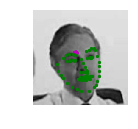

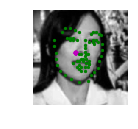

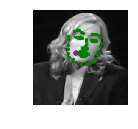

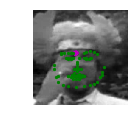

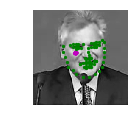

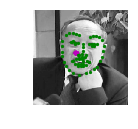

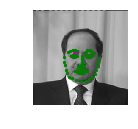

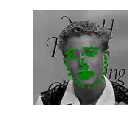

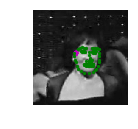

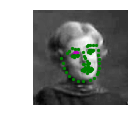

In [18]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):
   
    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's Variable wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

## Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](http://pytorch.org/docs/master/_modules/torch/nn/modules/loss.html).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [20]:
#I used GPU for large epoch size
net = net.cuda() 

In [19]:
## TODO: Define the loss and optimization
import torch.optim as optim

criterion = nn.MSELoss().cuda()

optimizer = optim.Adam(net.parameters(),lr=0.001)


## Training and Initial Observation

Now, you'll train on your batched training data from `train_loader` for a number of epochs. 

To quickly observe how your model is training and decide on whether or not you should modify it's structure or hyperparameters, you're encouraged to start off with just one or two epochs at first. As you train, note how your the model's loss behaves over time: does it decrease quickly at first and then slow down? Does it take a while to decrease in the first place? What happens if you change the batch size of your training data or modify your loss function? etc. 

Use these initial observations to make changes to your model and decide on the best architecture before you train for many epochs and create a final model.

In [15]:
#I checked GPU
torch.cuda.is_available()

True

In [21]:
#I change default tensor type for cuda
torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [20]:
def train_net(n_epochs):

    # prepare the net for training
    net.train()

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0
        requests.request("POST", "https://nebula.udacity.com/api/v1/remote/keep-alive", headers={'Authorization': "STAR " + token})
        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)
            
            # wrap them in a torch Variable
            images, key_pts = Variable(images), Variable(key_pts)
            
            images , key_pts = images.cuda(), key_pts.cuda()

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.cuda.FloatTensor)
            images = images.type(torch.cuda.FloatTensor)
            
            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            running_loss += loss.data[0]
            if batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/1000))
                running_loss = 0.0

    print('Finished Training')


In [ ]:
# train your network
n_epochs = 350 # start small, and increase when you've decided on your model structure and hyperparams

train_net(n_epochs)

Epoch: 1, Batch: 10, Avg. Loss: 0.0025299056768417357
Epoch: 1, Batch: 20, Avg. Loss: 0.001250458039343357
Epoch: 1, Batch: 30, Avg. Loss: 0.0019597883895039556
Epoch: 1, Batch: 40, Avg. Loss: 0.0009861832112073898
Epoch: 1, Batch: 50, Avg. Loss: 0.001133063029497862
Epoch: 1, Batch: 60, Avg. Loss: 0.001059621810913086
Epoch: 1, Batch: 70, Avg. Loss: 0.001222967840731144
Epoch: 1, Batch: 80, Avg. Loss: 0.001234809748828411
Epoch: 1, Batch: 90, Avg. Loss: 0.0012264530882239342
Epoch: 1, Batch: 100, Avg. Loss: 0.00147170190513134
Epoch: 1, Batch: 110, Avg. Loss: 0.0009736004024744033
Epoch: 1, Batch: 120, Avg. Loss: 0.00130719231069088
Epoch: 1, Batch: 130, Avg. Loss: 0.0010867109671235085
Epoch: 1, Batch: 140, Avg. Loss: 0.001228595644235611
Epoch: 1, Batch: 150, Avg. Loss: 0.001441830389201641
Epoch: 1, Batch: 160, Avg. Loss: 0.001045203872025013
Epoch: 1, Batch: 170, Avg. Loss: 0.0012508712634444236
Epoch: 1, Batch: 180, Avg. Loss: 0.0011568320542573928
Epoch: 1, Batch: 190, Avg. Loss

Epoch: 5, Batch: 160, Avg. Loss: 0.0006749106477946043
Epoch: 5, Batch: 170, Avg. Loss: 0.001732594795525074
Epoch: 5, Batch: 180, Avg. Loss: 0.0011758294887840748
Epoch: 5, Batch: 190, Avg. Loss: 0.0008605388253927231
Epoch: 5, Batch: 200, Avg. Loss: 0.000614184632897377
Epoch: 5, Batch: 210, Avg. Loss: 0.0011615995429456235
Epoch: 5, Batch: 220, Avg. Loss: 0.0005397604946047067
Epoch: 5, Batch: 230, Avg. Loss: 0.0007503245174884796
Epoch: 5, Batch: 240, Avg. Loss: 0.0009004143103957176
Epoch: 5, Batch: 250, Avg. Loss: 0.0005367325413972139
Epoch: 5, Batch: 260, Avg. Loss: 0.0006957647874951362
Epoch: 5, Batch: 270, Avg. Loss: 0.000647181686013937
Epoch: 5, Batch: 280, Avg. Loss: 0.0007557107619941234
Epoch: 5, Batch: 290, Avg. Loss: 0.0006202967986464501
Epoch: 5, Batch: 300, Avg. Loss: 0.0009192704148590564
Epoch: 5, Batch: 310, Avg. Loss: 0.0006016927473247051
Epoch: 5, Batch: 320, Avg. Loss: 0.0006262285877019167
Epoch: 5, Batch: 330, Avg. Loss: 0.0006573087237775326
Epoch: 5, Bat

Epoch: 9, Batch: 300, Avg. Loss: 0.0005295678023248911
Epoch: 9, Batch: 310, Avg. Loss: 0.0004355320930480957
Epoch: 9, Batch: 320, Avg. Loss: 0.00037414795719087124
Epoch: 9, Batch: 330, Avg. Loss: 0.0004056601356714964
Epoch: 9, Batch: 340, Avg. Loss: 0.0003063067514449358
Epoch: 10, Batch: 10, Avg. Loss: 0.00037155005149543287
Epoch: 10, Batch: 20, Avg. Loss: 0.00043533557839691637
Epoch: 10, Batch: 30, Avg. Loss: 0.0003814446739852428
Epoch: 10, Batch: 40, Avg. Loss: 0.0003393959254026413
Epoch: 10, Batch: 50, Avg. Loss: 0.0004945694170892239
Epoch: 10, Batch: 60, Avg. Loss: 0.00047684708796441556
Epoch: 10, Batch: 70, Avg. Loss: 0.0004925136435776949
Epoch: 10, Batch: 80, Avg. Loss: 0.00037162170000374316
Epoch: 10, Batch: 90, Avg. Loss: 0.0012429492492228747
Epoch: 10, Batch: 100, Avg. Loss: 0.0004633726216852665
Epoch: 10, Batch: 110, Avg. Loss: 0.0004424518402665853
Epoch: 10, Batch: 120, Avg. Loss: 0.0004953177273273468
Epoch: 10, Batch: 130, Avg. Loss: 0.00048282459191977976


Epoch: 14, Batch: 70, Avg. Loss: 0.00039671301934868095
Epoch: 14, Batch: 80, Avg. Loss: 0.0003656261134892702
Epoch: 14, Batch: 90, Avg. Loss: 0.00040098966658115386
Epoch: 14, Batch: 100, Avg. Loss: 0.00029353988356888293
Epoch: 14, Batch: 110, Avg. Loss: 0.0006792141888290644
Epoch: 14, Batch: 120, Avg. Loss: 0.0003366510011255741
Epoch: 14, Batch: 130, Avg. Loss: 0.0003840955104678869
Epoch: 14, Batch: 140, Avg. Loss: 0.0003315132837742567
Epoch: 14, Batch: 150, Avg. Loss: 0.00033345853351056577
Epoch: 14, Batch: 160, Avg. Loss: 0.0003490625899285078
Epoch: 14, Batch: 170, Avg. Loss: 0.00035183851048350333
Epoch: 14, Batch: 180, Avg. Loss: 0.0003964674295857549
Epoch: 14, Batch: 190, Avg. Loss: 0.00039765591360628607
Epoch: 14, Batch: 200, Avg. Loss: 0.0003477072604000568
Epoch: 14, Batch: 210, Avg. Loss: 0.000380144864320755
Epoch: 14, Batch: 220, Avg. Loss: 0.0003571078646928072
Epoch: 14, Batch: 230, Avg. Loss: 0.00040511462092399596
Epoch: 14, Batch: 240, Avg. Loss: 0.000284152

Epoch: 18, Batch: 180, Avg. Loss: 0.0003648930452764034
Epoch: 18, Batch: 190, Avg. Loss: 0.0004181222915649414
Epoch: 18, Batch: 200, Avg. Loss: 0.000341367756947875
Epoch: 18, Batch: 210, Avg. Loss: 0.00033012196980416775
Epoch: 18, Batch: 220, Avg. Loss: 0.0002094331057742238
Epoch: 18, Batch: 230, Avg. Loss: 0.0004544128160923719
Epoch: 18, Batch: 240, Avg. Loss: 0.00029255451261997223
Epoch: 18, Batch: 250, Avg. Loss: 0.00035928878746926783
Epoch: 18, Batch: 260, Avg. Loss: 0.00033938323706388476
Epoch: 18, Batch: 270, Avg. Loss: 0.00031232922617346046
Epoch: 18, Batch: 280, Avg. Loss: 0.0002717262674123049
Epoch: 18, Batch: 290, Avg. Loss: 0.00031145277991890906
Epoch: 18, Batch: 300, Avg. Loss: 0.00027108402363955976
Epoch: 18, Batch: 310, Avg. Loss: 0.0002886976422742009
Epoch: 18, Batch: 320, Avg. Loss: 0.00031917239539325237
Epoch: 18, Batch: 330, Avg. Loss: 0.00032412570528686047
Epoch: 18, Batch: 340, Avg. Loss: 0.0003011560421437025
Epoch: 19, Batch: 10, Avg. Loss: 0.00034

Epoch: 22, Batch: 290, Avg. Loss: 0.00023283497523516418
Epoch: 22, Batch: 300, Avg. Loss: 0.00027905446849763396
Epoch: 22, Batch: 310, Avg. Loss: 0.0002626813594251871
Epoch: 22, Batch: 320, Avg. Loss: 0.00023660952877253293
Epoch: 22, Batch: 330, Avg. Loss: 0.000300801214762032
Epoch: 22, Batch: 340, Avg. Loss: 0.00031490034982562063
Epoch: 23, Batch: 10, Avg. Loss: 0.0002666301894932985
Epoch: 23, Batch: 20, Avg. Loss: 0.0002804701644927263
Epoch: 23, Batch: 30, Avg. Loss: 0.0002447620127350092
Epoch: 23, Batch: 40, Avg. Loss: 0.00022454294469207526
Epoch: 23, Batch: 50, Avg. Loss: 0.00024023280292749405
Epoch: 23, Batch: 60, Avg. Loss: 0.0002316310340538621
Epoch: 23, Batch: 70, Avg. Loss: 0.00020180168002843858
Epoch: 23, Batch: 80, Avg. Loss: 0.00018927841354161501
Epoch: 23, Batch: 90, Avg. Loss: 0.0002935298783704638
Epoch: 23, Batch: 100, Avg. Loss: 0.00028413812723010777
Epoch: 23, Batch: 110, Avg. Loss: 0.00022906495071947573
Epoch: 23, Batch: 120, Avg. Loss: 0.000240648515

Epoch: 27, Batch: 50, Avg. Loss: 0.00024774222634732723
Epoch: 27, Batch: 60, Avg. Loss: 0.0002667728941887617
Epoch: 27, Batch: 70, Avg. Loss: 0.00021514822822064162
Epoch: 27, Batch: 80, Avg. Loss: 0.00025011042319238186
Epoch: 27, Batch: 90, Avg. Loss: 0.00025558264181017875
Epoch: 27, Batch: 100, Avg. Loss: 0.00019498866144567728
Epoch: 27, Batch: 110, Avg. Loss: 0.00037525983806699516
Epoch: 27, Batch: 120, Avg. Loss: 0.00030295821279287336
Epoch: 27, Batch: 130, Avg. Loss: 0.00021870571188628674
Epoch: 27, Batch: 140, Avg. Loss: 0.00032644687592983245
Epoch: 27, Batch: 150, Avg. Loss: 0.0003701247489079833
Epoch: 27, Batch: 160, Avg. Loss: 0.0003028518296778202
Epoch: 27, Batch: 170, Avg. Loss: 0.00020146709401160478
Epoch: 27, Batch: 180, Avg. Loss: 0.0002864596899598837
Epoch: 27, Batch: 190, Avg. Loss: 0.0002777201561257243
Epoch: 27, Batch: 200, Avg. Loss: 0.0004887727163732052
Epoch: 27, Batch: 210, Avg. Loss: 0.00034257022105157374
Epoch: 27, Batch: 220, Avg. Loss: 0.000328

Epoch: 31, Batch: 150, Avg. Loss: 0.0002816574377939105
Epoch: 31, Batch: 160, Avg. Loss: 0.0005201963186264038
Epoch: 31, Batch: 170, Avg. Loss: 0.0003367637898772955
Epoch: 31, Batch: 180, Avg. Loss: 0.00032858109846711157
Epoch: 31, Batch: 190, Avg. Loss: 0.0002595528606325388
Epoch: 31, Batch: 200, Avg. Loss: 0.0002243081573396921
Epoch: 31, Batch: 210, Avg. Loss: 0.00021989810187369584
Epoch: 31, Batch: 220, Avg. Loss: 0.00023152093775570393
Epoch: 31, Batch: 230, Avg. Loss: 0.00025551321636885406
Epoch: 31, Batch: 240, Avg. Loss: 0.00022463187109678985
Epoch: 31, Batch: 250, Avg. Loss: 0.00033868515398353336
Epoch: 31, Batch: 260, Avg. Loss: 0.0004078006315976381
Epoch: 31, Batch: 270, Avg. Loss: 0.00023434257321059703
Epoch: 31, Batch: 280, Avg. Loss: 0.00021431861631572246
Epoch: 31, Batch: 290, Avg. Loss: 0.00033603985235095024
Epoch: 31, Batch: 300, Avg. Loss: 0.0003161429222673178
Epoch: 31, Batch: 310, Avg. Loss: 0.0005701785823330283
Epoch: 31, Batch: 320, Avg. Loss: 0.000

Epoch: 35, Batch: 250, Avg. Loss: 0.00024427942000329497
Epoch: 35, Batch: 260, Avg. Loss: 0.00019442659243941308
Epoch: 35, Batch: 270, Avg. Loss: 0.00021833431348204614
Epoch: 35, Batch: 280, Avg. Loss: 0.00020088899414986373
Epoch: 35, Batch: 290, Avg. Loss: 0.0002911102529615164
Epoch: 35, Batch: 300, Avg. Loss: 0.0002139757899567485
Epoch: 35, Batch: 310, Avg. Loss: 0.0002804814465343952
Epoch: 35, Batch: 320, Avg. Loss: 0.00028835531044751406
Epoch: 35, Batch: 330, Avg. Loss: 0.0003059144001454115
Epoch: 35, Batch: 340, Avg. Loss: 0.00025673724617809055
Epoch: 36, Batch: 10, Avg. Loss: 0.0002885976135730743
Epoch: 36, Batch: 20, Avg. Loss: 0.00026946276240050795
Epoch: 36, Batch: 30, Avg. Loss: 0.0002344141248613596
Epoch: 36, Batch: 40, Avg. Loss: 0.0003908993806689978
Epoch: 36, Batch: 50, Avg. Loss: 0.0003037459356710315
Epoch: 36, Batch: 60, Avg. Loss: 0.00022286129277199508
Epoch: 36, Batch: 70, Avg. Loss: 0.00029851609095931053
Epoch: 36, Batch: 80, Avg. Loss: 0.00023893466

Epoch: 40, Batch: 10, Avg. Loss: 0.00021600476000458002
Epoch: 40, Batch: 20, Avg. Loss: 0.00021632031723856925
Epoch: 40, Batch: 30, Avg. Loss: 0.00028938591573387384
Epoch: 40, Batch: 40, Avg. Loss: 0.0002538029728457332
Epoch: 40, Batch: 50, Avg. Loss: 0.000177953589707613
Epoch: 40, Batch: 60, Avg. Loss: 0.00023824736289680004
Epoch: 40, Batch: 70, Avg. Loss: 0.00023284042347222566
Epoch: 40, Batch: 80, Avg. Loss: 0.00030592041462659835
Epoch: 40, Batch: 90, Avg. Loss: 0.0002482917634770274
Epoch: 40, Batch: 100, Avg. Loss: 0.00023067818488925696
Epoch: 40, Batch: 110, Avg. Loss: 0.0003226965256035328
Epoch: 40, Batch: 120, Avg. Loss: 0.00019672855269163846
Epoch: 40, Batch: 130, Avg. Loss: 0.0002029222631826997
Epoch: 40, Batch: 140, Avg. Loss: 0.00018312409799546003
Epoch: 40, Batch: 150, Avg. Loss: 0.0002592839151620865
Epoch: 40, Batch: 160, Avg. Loss: 0.00025510454270988704
Epoch: 40, Batch: 170, Avg. Loss: 0.0004128926545381546
Epoch: 40, Batch: 180, Avg. Loss: 0.000260521936

Epoch: 44, Batch: 110, Avg. Loss: 0.00031391957495361566
Epoch: 44, Batch: 120, Avg. Loss: 0.0002424509860575199
Epoch: 44, Batch: 130, Avg. Loss: 0.0002250620434060693
Epoch: 44, Batch: 140, Avg. Loss: 0.00025197043176740407
Epoch: 44, Batch: 150, Avg. Loss: 0.00031779428757727144
Epoch: 44, Batch: 160, Avg. Loss: 0.0002461087740957737
Epoch: 44, Batch: 170, Avg. Loss: 0.000186764033511281
Epoch: 44, Batch: 180, Avg. Loss: 0.0002482064999639988
Epoch: 44, Batch: 190, Avg. Loss: 0.00022058198507875204
Epoch: 44, Batch: 200, Avg. Loss: 0.00022099550627171992
Epoch: 44, Batch: 210, Avg. Loss: 0.00021420834679156543
Epoch: 44, Batch: 220, Avg. Loss: 0.0002767405062913895
Epoch: 44, Batch: 230, Avg. Loss: 0.00025905830040574075
Epoch: 44, Batch: 240, Avg. Loss: 0.00046566761285066606
Epoch: 44, Batch: 250, Avg. Loss: 0.0002963378299027681
Epoch: 44, Batch: 260, Avg. Loss: 0.00025055409502238037
Epoch: 44, Batch: 270, Avg. Loss: 0.0001801768373697996
Epoch: 44, Batch: 280, Avg. Loss: 0.0002

Epoch: 48, Batch: 210, Avg. Loss: 0.0002640632698312402
Epoch: 48, Batch: 220, Avg. Loss: 0.00021072017028927803
Epoch: 48, Batch: 230, Avg. Loss: 0.000203766000457108
Epoch: 48, Batch: 240, Avg. Loss: 0.0001633335193619132
Epoch: 48, Batch: 250, Avg. Loss: 0.00023471913672983645
Epoch: 48, Batch: 260, Avg. Loss: 0.00021957457531243563
Epoch: 48, Batch: 270, Avg. Loss: 0.00019673338811844587
Epoch: 48, Batch: 280, Avg. Loss: 0.0001966268252581358
Epoch: 48, Batch: 290, Avg. Loss: 0.000537241006270051
Epoch: 48, Batch: 300, Avg. Loss: 0.0003396695405244827
Epoch: 48, Batch: 310, Avg. Loss: 0.00025238365959376097
Epoch: 48, Batch: 320, Avg. Loss: 0.00034853798616677525
Epoch: 48, Batch: 330, Avg. Loss: 0.0005311694508418441
Epoch: 48, Batch: 340, Avg. Loss: 0.0002824697205796838
Epoch: 49, Batch: 10, Avg. Loss: 0.00021622972097247838
Epoch: 49, Batch: 20, Avg. Loss: 0.00021702625788748266
Epoch: 49, Batch: 30, Avg. Loss: 0.00021278666891157627
Epoch: 49, Batch: 40, Avg. Loss: 0.000238791

Epoch: 52, Batch: 310, Avg. Loss: 0.000251287043094635
Epoch: 52, Batch: 320, Avg. Loss: 0.0008372988440096378
Epoch: 52, Batch: 330, Avg. Loss: 0.00028861523792147634
Epoch: 52, Batch: 340, Avg. Loss: 0.0003021454568952322
Epoch: 53, Batch: 10, Avg. Loss: 0.00019812317565083505
Epoch: 53, Batch: 20, Avg. Loss: 0.00026643181405961515
Epoch: 53, Batch: 30, Avg. Loss: 0.00021701854839920997
Epoch: 53, Batch: 40, Avg. Loss: 0.0002462107082828879
Epoch: 53, Batch: 50, Avg. Loss: 0.0002466866010800004
Epoch: 53, Batch: 60, Avg. Loss: 0.00022295457124710082
Epoch: 53, Batch: 70, Avg. Loss: 0.00017368219047784805
Epoch: 53, Batch: 80, Avg. Loss: 0.00020427361130714416
Epoch: 53, Batch: 90, Avg. Loss: 0.0002436189465224743
Epoch: 53, Batch: 100, Avg. Loss: 0.0002214313056319952
Epoch: 53, Batch: 110, Avg. Loss: 0.0002515563080087304
Epoch: 53, Batch: 120, Avg. Loss: 0.00022292664274573326
Epoch: 53, Batch: 130, Avg. Loss: 0.0002152990289032459
Epoch: 53, Batch: 140, Avg. Loss: 0.00025889326538

Epoch: 57, Batch: 70, Avg. Loss: 0.00020754772704094647
Epoch: 57, Batch: 80, Avg. Loss: 0.0001700262948870659
Epoch: 57, Batch: 90, Avg. Loss: 0.0002038629949092865
Epoch: 57, Batch: 100, Avg. Loss: 0.0001951934713870287
Epoch: 57, Batch: 110, Avg. Loss: 0.00025778376776725053
Epoch: 57, Batch: 120, Avg. Loss: 0.00017600139323621988
Epoch: 57, Batch: 130, Avg. Loss: 0.00018927879631519317
Epoch: 57, Batch: 140, Avg. Loss: 0.00028274265583604573
Epoch: 57, Batch: 150, Avg. Loss: 0.0002406502850353718
Epoch: 57, Batch: 160, Avg. Loss: 0.00031254546344280243
Epoch: 57, Batch: 170, Avg. Loss: 0.0002442391701042652
Epoch: 57, Batch: 180, Avg. Loss: 0.00020515287946909667
Epoch: 57, Batch: 190, Avg. Loss: 0.00021464182902127506
Epoch: 57, Batch: 200, Avg. Loss: 0.0001938459174707532
Epoch: 57, Batch: 210, Avg. Loss: 0.00019677897170186043
Epoch: 57, Batch: 220, Avg. Loss: 0.00019687397498637437
Epoch: 57, Batch: 230, Avg. Loss: 0.00021900933980941774
Epoch: 57, Batch: 240, Avg. Loss: 0.0001

Epoch: 61, Batch: 170, Avg. Loss: 0.0002782626999542117
Epoch: 61, Batch: 180, Avg. Loss: 0.00027996057271957396
Epoch: 61, Batch: 190, Avg. Loss: 0.0002606456875801086
Epoch: 61, Batch: 200, Avg. Loss: 0.0002360232099890709
Epoch: 61, Batch: 210, Avg. Loss: 0.00022698414511978626
Epoch: 61, Batch: 220, Avg. Loss: 0.0004153196280822158
Epoch: 61, Batch: 230, Avg. Loss: 0.0002982589835301042
Epoch: 61, Batch: 240, Avg. Loss: 0.00026588726975023747
Epoch: 61, Batch: 250, Avg. Loss: 0.00023074757121503353
Epoch: 61, Batch: 260, Avg. Loss: 0.00022606727480888367
Epoch: 61, Batch: 270, Avg. Loss: 0.0002962010558694601
Epoch: 61, Batch: 280, Avg. Loss: 0.00021482095308601856
Epoch: 61, Batch: 290, Avg. Loss: 0.00020281327702105045
Epoch: 61, Batch: 300, Avg. Loss: 0.0001756986388936639
Epoch: 61, Batch: 310, Avg. Loss: 0.0002244514347985387
Epoch: 61, Batch: 320, Avg. Loss: 0.0002145638633519411
Epoch: 61, Batch: 330, Avg. Loss: 0.00026121297758072615
Epoch: 61, Batch: 340, Avg. Loss: 0.0001

Epoch: 65, Batch: 270, Avg. Loss: 0.00022746093012392522
Epoch: 65, Batch: 280, Avg. Loss: 0.0001758151752874255
Epoch: 65, Batch: 290, Avg. Loss: 0.00027209694031625985
Epoch: 65, Batch: 300, Avg. Loss: 0.00019349779188632964
Epoch: 65, Batch: 310, Avg. Loss: 0.0002149886218830943
Epoch: 65, Batch: 320, Avg. Loss: 0.00018967968318611383
Epoch: 65, Batch: 330, Avg. Loss: 0.00015884742792695761
Epoch: 65, Batch: 340, Avg. Loss: 0.00015992648806422948
Epoch: 66, Batch: 10, Avg. Loss: 0.00023671101592481137
Epoch: 66, Batch: 20, Avg. Loss: 0.00019526236224919557
Epoch: 66, Batch: 30, Avg. Loss: 0.0001814564000815153
Epoch: 66, Batch: 40, Avg. Loss: 0.00015079525578767062
Epoch: 66, Batch: 50, Avg. Loss: 0.0002010672315955162
Epoch: 66, Batch: 60, Avg. Loss: 0.00022095475904643536
Epoch: 66, Batch: 70, Avg. Loss: 0.00021745201945304871
Epoch: 66, Batch: 80, Avg. Loss: 0.0001785606872290373
Epoch: 66, Batch: 90, Avg. Loss: 0.00023877226281911136
Epoch: 66, Batch: 100, Avg. Loss: 0.000188689

Epoch: 70, Batch: 30, Avg. Loss: 0.00018487506359815596
Epoch: 70, Batch: 40, Avg. Loss: 0.00032902851700782775
Epoch: 70, Batch: 50, Avg. Loss: 0.00019692686945199967
Epoch: 70, Batch: 60, Avg. Loss: 0.0001996308248490095
Epoch: 70, Batch: 70, Avg. Loss: 0.00021964526642113925
Epoch: 70, Batch: 80, Avg. Loss: 0.0002979497006163001
Epoch: 70, Batch: 90, Avg. Loss: 0.00032365075033158065
Epoch: 70, Batch: 100, Avg. Loss: 0.0002286381945014
Epoch: 70, Batch: 110, Avg. Loss: 0.00017111131269484758
Epoch: 70, Batch: 120, Avg. Loss: 0.00017256709933280944
Epoch: 70, Batch: 130, Avg. Loss: 0.0002097009224817157
Epoch: 70, Batch: 140, Avg. Loss: 0.0002277243109419942
Epoch: 70, Batch: 150, Avg. Loss: 0.00022428958490490914
Epoch: 70, Batch: 160, Avg. Loss: 0.0009238043799996376
Epoch: 70, Batch: 170, Avg. Loss: 0.0002574435388669372
Epoch: 70, Batch: 180, Avg. Loss: 0.00027893528528511526
Epoch: 70, Batch: 190, Avg. Loss: 0.0002580890525132418
Epoch: 70, Batch: 200, Avg. Loss: 0.0002215277142

Epoch: 74, Batch: 130, Avg. Loss: 0.00019820402935147286
Epoch: 74, Batch: 140, Avg. Loss: 0.0002310028187930584
Epoch: 74, Batch: 150, Avg. Loss: 0.0001626519039273262
Epoch: 74, Batch: 160, Avg. Loss: 0.00028853903152048586
Epoch: 74, Batch: 170, Avg. Loss: 0.0009579053800553083
Epoch: 74, Batch: 180, Avg. Loss: 0.0002749899048358202
Epoch: 74, Batch: 190, Avg. Loss: 0.00023196625523269176
Epoch: 74, Batch: 200, Avg. Loss: 0.000243690456263721
Epoch: 74, Batch: 210, Avg. Loss: 0.00019616534002125263
Epoch: 74, Batch: 220, Avg. Loss: 0.0002362060295417905
Epoch: 74, Batch: 230, Avg. Loss: 0.0002239790465682745
Epoch: 74, Batch: 240, Avg. Loss: 0.00019187189172953367
Epoch: 74, Batch: 250, Avg. Loss: 0.0002920430367812514
Epoch: 74, Batch: 260, Avg. Loss: 0.0004248958742246032
Epoch: 74, Batch: 270, Avg. Loss: 0.00024839974753558633
Epoch: 74, Batch: 280, Avg. Loss: 0.00020230125449597835
Epoch: 74, Batch: 290, Avg. Loss: 0.0001854287935420871
Epoch: 74, Batch: 300, Avg. Loss: 0.001159

Epoch: 78, Batch: 230, Avg. Loss: 0.00020908432081341742
Epoch: 78, Batch: 240, Avg. Loss: 0.00017211065348237754
Epoch: 78, Batch: 250, Avg. Loss: 0.0002045892458409071
Epoch: 78, Batch: 260, Avg. Loss: 0.0001606017081066966
Epoch: 78, Batch: 270, Avg. Loss: 0.00047423313092440365
Epoch: 78, Batch: 280, Avg. Loss: 0.00041167723201215265
Epoch: 78, Batch: 290, Avg. Loss: 0.00030176877416670324
Epoch: 78, Batch: 300, Avg. Loss: 0.0002866477239876986
Epoch: 78, Batch: 310, Avg. Loss: 0.00021216983441263437
Epoch: 78, Batch: 320, Avg. Loss: 0.00021147220488637686
Epoch: 78, Batch: 330, Avg. Loss: 0.00018151933513581753
Epoch: 78, Batch: 340, Avg. Loss: 0.0002565766898915172
Epoch: 79, Batch: 10, Avg. Loss: 0.00018895403016358614
Epoch: 79, Batch: 20, Avg. Loss: 0.00023791937716305256
Epoch: 79, Batch: 30, Avg. Loss: 0.00022592432238161564
Epoch: 79, Batch: 40, Avg. Loss: 0.0002609426127746701
Epoch: 79, Batch: 50, Avg. Loss: 0.00020767869148403405
Epoch: 79, Batch: 60, Avg. Loss: 0.000170

Epoch: 82, Batch: 330, Avg. Loss: 0.0001263255598023534
Epoch: 82, Batch: 340, Avg. Loss: 0.0001644562571309507
Epoch: 83, Batch: 10, Avg. Loss: 0.00021848573349416255
Epoch: 83, Batch: 20, Avg. Loss: 0.00018774272873997688
Epoch: 83, Batch: 30, Avg. Loss: 0.00018362555652856827
Epoch: 83, Batch: 40, Avg. Loss: 0.00021882043685764074
Epoch: 83, Batch: 50, Avg. Loss: 0.00018599239364266396
Epoch: 83, Batch: 60, Avg. Loss: 0.0002201833985745907
Epoch: 83, Batch: 70, Avg. Loss: 0.00018085167463868858
Epoch: 83, Batch: 80, Avg. Loss: 0.000245979986153543
Epoch: 83, Batch: 90, Avg. Loss: 0.00022910331096500158
Epoch: 83, Batch: 100, Avg. Loss: 0.00016013389639556408
Epoch: 83, Batch: 110, Avg. Loss: 0.00017611205112189054
Epoch: 83, Batch: 120, Avg. Loss: 0.00013682906143367291
Epoch: 83, Batch: 130, Avg. Loss: 0.00020281851757317782
Epoch: 83, Batch: 140, Avg. Loss: 0.00017746878415346145
Epoch: 83, Batch: 150, Avg. Loss: 0.00044525863975286486
Epoch: 83, Batch: 160, Avg. Loss: 0.000179314

Epoch: 87, Batch: 90, Avg. Loss: 0.00016619811486452818
Epoch: 87, Batch: 100, Avg. Loss: 0.00020023831725120544
Epoch: 87, Batch: 110, Avg. Loss: 0.00021926685050129892
Epoch: 87, Batch: 120, Avg. Loss: 0.00016744376439601182
Epoch: 87, Batch: 130, Avg. Loss: 0.00043899282440543175
Epoch: 87, Batch: 140, Avg. Loss: 0.00018783216271549464
Epoch: 87, Batch: 150, Avg. Loss: 0.0002530126515775919
Epoch: 87, Batch: 160, Avg. Loss: 0.00022827531397342683
Epoch: 87, Batch: 170, Avg. Loss: 0.00016953999921679496
Epoch: 87, Batch: 180, Avg. Loss: 0.00019261487573385237
Epoch: 87, Batch: 190, Avg. Loss: 0.00022359563037753106
Epoch: 87, Batch: 200, Avg. Loss: 0.0002752967057749629
Epoch: 87, Batch: 210, Avg. Loss: 0.0002747060935944319
Epoch: 87, Batch: 220, Avg. Loss: 0.00018475796561688186
Epoch: 87, Batch: 230, Avg. Loss: 0.0001786153018474579
Epoch: 87, Batch: 240, Avg. Loss: 0.00023132251668721437
Epoch: 87, Batch: 250, Avg. Loss: 0.00014991407468914985
Epoch: 87, Batch: 260, Avg. Loss: 0.

Epoch: 91, Batch: 190, Avg. Loss: 0.0002151983669027686
Epoch: 91, Batch: 200, Avg. Loss: 0.0006842897236347199
Epoch: 91, Batch: 210, Avg. Loss: 0.00032324614748358726
Epoch: 91, Batch: 220, Avg. Loss: 0.00021834200248122215
Epoch: 91, Batch: 230, Avg. Loss: 0.0001911578131839633
Epoch: 91, Batch: 240, Avg. Loss: 0.0004976573092862963
Epoch: 91, Batch: 250, Avg. Loss: 0.00018501192145049572
Epoch: 91, Batch: 260, Avg. Loss: 0.0003783997017890215
Epoch: 91, Batch: 270, Avg. Loss: 0.00022226794250309467
Epoch: 91, Batch: 280, Avg. Loss: 0.0003590672304853797
Epoch: 91, Batch: 290, Avg. Loss: 0.0001668287180364132
Epoch: 91, Batch: 300, Avg. Loss: 0.0002534609083086252
Epoch: 91, Batch: 310, Avg. Loss: 0.00019588055182248354
Epoch: 91, Batch: 320, Avg. Loss: 0.00016757709067314862
Epoch: 91, Batch: 330, Avg. Loss: 0.00024007122311741114
Epoch: 91, Batch: 340, Avg. Loss: 0.00016798514127731322
Epoch: 92, Batch: 10, Avg. Loss: 0.0003427466526627541
Epoch: 92, Batch: 20, Avg. Loss: 0.000248

Epoch: 95, Batch: 290, Avg. Loss: 0.00019931127317249775
Epoch: 95, Batch: 300, Avg. Loss: 0.0003505055238492787
Epoch: 95, Batch: 310, Avg. Loss: 0.00017664737068116666
Epoch: 95, Batch: 320, Avg. Loss: 0.00020985519327223302
Epoch: 95, Batch: 330, Avg. Loss: 0.00020411196164786815
Epoch: 95, Batch: 340, Avg. Loss: 0.00021295065432786942
Epoch: 96, Batch: 10, Avg. Loss: 0.00023764083348214626
Epoch: 96, Batch: 20, Avg. Loss: 0.00017721180617809296
Epoch: 96, Batch: 30, Avg. Loss: 0.00021062198001891373
Epoch: 96, Batch: 40, Avg. Loss: 0.00024369775410741567
Epoch: 96, Batch: 50, Avg. Loss: 0.00016588863544166087
Epoch: 96, Batch: 60, Avg. Loss: 0.00017959473934024573
Epoch: 96, Batch: 70, Avg. Loss: 0.00022666149213910103
Epoch: 96, Batch: 80, Avg. Loss: 0.00019623915385454894
Epoch: 96, Batch: 90, Avg. Loss: 0.0002124841185286641
Epoch: 96, Batch: 100, Avg. Loss: 0.00016900657303631306
Epoch: 96, Batch: 110, Avg. Loss: 0.0001616508588194847
Epoch: 96, Batch: 120, Avg. Loss: 0.0002149

Epoch: 100, Batch: 50, Avg. Loss: 0.0002723358105868101
Epoch: 100, Batch: 60, Avg. Loss: 0.00021161770168691874
Epoch: 100, Batch: 70, Avg. Loss: 0.0002805508961901069
Epoch: 100, Batch: 80, Avg. Loss: 0.0001795196132734418
Epoch: 100, Batch: 90, Avg. Loss: 0.00021243389882147313
Epoch: 100, Batch: 100, Avg. Loss: 0.0002730387263000011
Epoch: 100, Batch: 110, Avg. Loss: 0.00018379266373813152
Epoch: 100, Batch: 120, Avg. Loss: 0.0001977551393210888
Epoch: 100, Batch: 130, Avg. Loss: 0.0001927435779944062
Epoch: 100, Batch: 140, Avg. Loss: 0.0010520553784444928
Epoch: 100, Batch: 150, Avg. Loss: 0.00025631151720881463
Epoch: 100, Batch: 160, Avg. Loss: 0.00028155831340700386
Epoch: 100, Batch: 170, Avg. Loss: 0.0001978174429386854
Epoch: 100, Batch: 180, Avg. Loss: 0.00018014003336429597
Epoch: 100, Batch: 190, Avg. Loss: 0.00020987754873931408
Epoch: 100, Batch: 200, Avg. Loss: 0.000216188108548522
Epoch: 100, Batch: 210, Avg. Loss: 0.00020397787727415562
Epoch: 100, Batch: 220, Avg. 

Epoch: 104, Batch: 130, Avg. Loss: 0.000174837714061141
Epoch: 104, Batch: 140, Avg. Loss: 0.00029810106474906207
Epoch: 104, Batch: 150, Avg. Loss: 0.00025525875110179183
Epoch: 104, Batch: 160, Avg. Loss: 0.00025165360886603594
Epoch: 104, Batch: 170, Avg. Loss: 0.00019014462735503912
Epoch: 104, Batch: 180, Avg. Loss: 0.00020943767484277488
Epoch: 104, Batch: 190, Avg. Loss: 0.00019084672071039677
Epoch: 104, Batch: 200, Avg. Loss: 0.00016234155371785164
Epoch: 104, Batch: 210, Avg. Loss: 0.0001571862008422613
Epoch: 104, Batch: 220, Avg. Loss: 0.00020987936574965715
Epoch: 104, Batch: 230, Avg. Loss: 0.00015010547172278165
Epoch: 104, Batch: 240, Avg. Loss: 0.00023721620440483093
Epoch: 104, Batch: 250, Avg. Loss: 0.00018552909232676028
Epoch: 104, Batch: 260, Avg. Loss: 0.00020590636879205704
Epoch: 104, Batch: 270, Avg. Loss: 0.00044130434654653073
Epoch: 104, Batch: 280, Avg. Loss: 0.00022440866380929946
Epoch: 104, Batch: 290, Avg. Loss: 0.001837586423382163
Epoch: 104, Batch: 

Epoch: 108, Batch: 200, Avg. Loss: 0.0002605189252644777
Epoch: 108, Batch: 210, Avg. Loss: 0.00019515740405768155
Epoch: 108, Batch: 220, Avg. Loss: 0.0001762171508744359
Epoch: 108, Batch: 230, Avg. Loss: 0.0003202819116413593
Epoch: 108, Batch: 240, Avg. Loss: 0.00029793372564017773
Epoch: 108, Batch: 250, Avg. Loss: 0.0002410688688978553
Epoch: 108, Batch: 260, Avg. Loss: 0.0001854261104017496
Epoch: 108, Batch: 270, Avg. Loss: 0.00029058112483471634
Epoch: 108, Batch: 280, Avg. Loss: 0.0002100660791620612
Epoch: 108, Batch: 290, Avg. Loss: 0.00017531119287014007
Epoch: 108, Batch: 300, Avg. Loss: 0.00017573742847889663
Epoch: 108, Batch: 310, Avg. Loss: 0.000173878557048738
Epoch: 108, Batch: 320, Avg. Loss: 0.0002534693032503128
Epoch: 108, Batch: 330, Avg. Loss: 0.001792210596613586
Epoch: 108, Batch: 340, Avg. Loss: 0.00035121550038456917
Epoch: 109, Batch: 10, Avg. Loss: 0.00017650338169187307
Epoch: 109, Batch: 20, Avg. Loss: 0.0001836858792230487
Epoch: 109, Batch: 30, Avg. 

Epoch: 112, Batch: 270, Avg. Loss: 0.00046085903700441124
Epoch: 112, Batch: 280, Avg. Loss: 0.00013611437194049357
Epoch: 112, Batch: 290, Avg. Loss: 0.00020631657261401416
Epoch: 112, Batch: 300, Avg. Loss: 0.00016750153619796038
Epoch: 112, Batch: 310, Avg. Loss: 0.0001949788574129343
Epoch: 112, Batch: 320, Avg. Loss: 0.00020840314123779535
Epoch: 112, Batch: 330, Avg. Loss: 0.00019280506670475006
Epoch: 112, Batch: 340, Avg. Loss: 0.00016189222130924463
Epoch: 113, Batch: 10, Avg. Loss: 0.00016660787165164947
Epoch: 113, Batch: 20, Avg. Loss: 0.00017930997628718616
Epoch: 113, Batch: 30, Avg. Loss: 0.00014745167270302772
Epoch: 113, Batch: 40, Avg. Loss: 0.00012981003150343894
Epoch: 113, Batch: 50, Avg. Loss: 0.0001859634593129158
Epoch: 113, Batch: 60, Avg. Loss: 0.00017909914441406727
Epoch: 113, Batch: 70, Avg. Loss: 0.00019053302705287933
Epoch: 113, Batch: 80, Avg. Loss: 0.00015898778289556503
Epoch: 113, Batch: 90, Avg. Loss: 0.00019458613265305758
Epoch: 113, Batch: 100, A

Epoch: 116, Batch: 340, Avg. Loss: 0.00019904626253992318
Epoch: 117, Batch: 10, Avg. Loss: 0.00017842196300625802
Epoch: 117, Batch: 20, Avg. Loss: 0.0003308275695890188
Epoch: 117, Batch: 30, Avg. Loss: 0.0002083317507058382
Epoch: 117, Batch: 40, Avg. Loss: 0.000769774692133069
Epoch: 117, Batch: 50, Avg. Loss: 0.00019059300981462
Epoch: 117, Batch: 60, Avg. Loss: 0.00016282586008310317
Epoch: 117, Batch: 70, Avg. Loss: 0.00021609267964959144
Epoch: 117, Batch: 80, Avg. Loss: 0.00020485646650195122
Epoch: 117, Batch: 90, Avg. Loss: 0.0001725949738174677
Epoch: 117, Batch: 100, Avg. Loss: 0.00017447374947369098
Epoch: 117, Batch: 110, Avg. Loss: 0.00023216486256569623
Epoch: 117, Batch: 120, Avg. Loss: 0.00016847105603665113
Epoch: 117, Batch: 130, Avg. Loss: 0.00015720253810286522
Epoch: 117, Batch: 140, Avg. Loss: 0.00018646997679024936
Epoch: 117, Batch: 150, Avg. Loss: 0.00014574825763702393
Epoch: 117, Batch: 160, Avg. Loss: 0.00019113518297672271
Epoch: 117, Batch: 170, Avg. Lo

Epoch: 121, Batch: 70, Avg. Loss: 0.00017540552373975516
Epoch: 121, Batch: 80, Avg. Loss: 0.0001777965361252427
Epoch: 121, Batch: 90, Avg. Loss: 0.00019663473032414914
Epoch: 121, Batch: 100, Avg. Loss: 0.00014587069861590862
Epoch: 121, Batch: 110, Avg. Loss: 0.00019436302036046982
Epoch: 121, Batch: 120, Avg. Loss: 0.0001849219100549817
Epoch: 121, Batch: 130, Avg. Loss: 0.00016148339305073023
Epoch: 121, Batch: 140, Avg. Loss: 0.00018563249614089727
Epoch: 121, Batch: 150, Avg. Loss: 0.00021852948889136315
Epoch: 121, Batch: 160, Avg. Loss: 0.000123993631452322
Epoch: 121, Batch: 170, Avg. Loss: 0.0002001488283276558
Epoch: 121, Batch: 180, Avg. Loss: 0.00014487838465720415
Epoch: 121, Batch: 190, Avg. Loss: 0.00016421004012227058
Epoch: 121, Batch: 200, Avg. Loss: 0.00013351801037788391
Epoch: 121, Batch: 210, Avg. Loss: 0.00017052318900823594
Epoch: 121, Batch: 220, Avg. Loss: 0.0002993008531630039
Epoch: 121, Batch: 230, Avg. Loss: 0.00019557005632668735
Epoch: 121, Batch: 240,

Epoch: 125, Batch: 140, Avg. Loss: 0.0004455143315717578
Epoch: 125, Batch: 150, Avg. Loss: 0.0002602875819429755
Epoch: 125, Batch: 160, Avg. Loss: 0.00023969460278749466
Epoch: 125, Batch: 170, Avg. Loss: 0.00023699118942022325
Epoch: 125, Batch: 180, Avg. Loss: 0.0002838283991441131
Epoch: 125, Batch: 190, Avg. Loss: 0.000381664851680398
Epoch: 125, Batch: 200, Avg. Loss: 0.0003285129265859723
Epoch: 125, Batch: 210, Avg. Loss: 0.00024108756240457296
Epoch: 125, Batch: 220, Avg. Loss: 0.00022763602435588837
Epoch: 125, Batch: 230, Avg. Loss: 0.00020047681871801615
Epoch: 125, Batch: 240, Avg. Loss: 0.00019727302808314562
Epoch: 125, Batch: 250, Avg. Loss: 0.0002488216329365969
Epoch: 125, Batch: 260, Avg. Loss: 0.00019098075293004513
Epoch: 125, Batch: 270, Avg. Loss: 0.00017279983311891555
Epoch: 125, Batch: 280, Avg. Loss: 0.00016158472374081613
Epoch: 125, Batch: 290, Avg. Loss: 0.0001778294574469328
Epoch: 125, Batch: 300, Avg. Loss: 0.0001790886167436838
Epoch: 125, Batch: 310,

Epoch: 129, Batch: 210, Avg. Loss: 0.00022004297748208046
Epoch: 129, Batch: 220, Avg. Loss: 0.00015892593562602997
Epoch: 129, Batch: 230, Avg. Loss: 0.00017386481631547212
Epoch: 129, Batch: 240, Avg. Loss: 0.00017350582871586084
Epoch: 129, Batch: 250, Avg. Loss: 0.00016366190277040005
Epoch: 129, Batch: 260, Avg. Loss: 0.0002451601438224316
Epoch: 129, Batch: 270, Avg. Loss: 0.00018831404484808445
Epoch: 129, Batch: 280, Avg. Loss: 0.00018242205400019885
Epoch: 129, Batch: 290, Avg. Loss: 0.000778197162784636
Epoch: 129, Batch: 300, Avg. Loss: 0.000255980322137475
Epoch: 129, Batch: 310, Avg. Loss: 0.00034116183035075667
Epoch: 129, Batch: 320, Avg. Loss: 0.0003038342520594597
Epoch: 129, Batch: 330, Avg. Loss: 0.00024543438199907543
Epoch: 129, Batch: 340, Avg. Loss: 0.00027822290640324354
Epoch: 130, Batch: 10, Avg. Loss: 0.0004710501302033663
Epoch: 130, Batch: 20, Avg. Loss: 0.0005410217456519604
Epoch: 130, Batch: 30, Avg. Loss: 0.00032259034551680087
Epoch: 130, Batch: 40, Av

Epoch: 133, Batch: 280, Avg. Loss: 0.00020060293469578028
Epoch: 133, Batch: 290, Avg. Loss: 0.00043778110574930904
Epoch: 133, Batch: 300, Avg. Loss: 0.0001952988151460886
Epoch: 133, Batch: 310, Avg. Loss: 0.0007607554551213979
Epoch: 133, Batch: 320, Avg. Loss: 0.0002659940980374813
Epoch: 133, Batch: 330, Avg. Loss: 0.00027240590564906597
Epoch: 133, Batch: 340, Avg. Loss: 0.00019075315538793803
Epoch: 134, Batch: 10, Avg. Loss: 0.0002501422259956598
Epoch: 134, Batch: 20, Avg. Loss: 0.00017141321022063493
Epoch: 134, Batch: 30, Avg. Loss: 0.0002742032567039132
Epoch: 134, Batch: 40, Avg. Loss: 0.00014887733571231364
Epoch: 134, Batch: 50, Avg. Loss: 0.00017816237825900316
Epoch: 134, Batch: 60, Avg. Loss: 0.00018673978187143804
Epoch: 134, Batch: 70, Avg. Loss: 0.0002496722601354122
Epoch: 134, Batch: 80, Avg. Loss: 0.00017405324429273605
Epoch: 134, Batch: 90, Avg. Loss: 0.00021521449089050292
Epoch: 134, Batch: 100, Avg. Loss: 0.00021703137923032045
Epoch: 134, Batch: 110, Avg. 

Epoch: 138, Batch: 10, Avg. Loss: 0.0001990929925814271
Epoch: 138, Batch: 20, Avg. Loss: 0.00020715878903865815
Epoch: 138, Batch: 30, Avg. Loss: 0.0001744033442810178
Epoch: 138, Batch: 40, Avg. Loss: 0.00016044298280030488
Epoch: 138, Batch: 50, Avg. Loss: 0.00024960082955658434
Epoch: 138, Batch: 60, Avg. Loss: 0.00018840299732983114
Epoch: 138, Batch: 70, Avg. Loss: 0.0001369642484933138
Epoch: 138, Batch: 80, Avg. Loss: 0.000303178277797997
Epoch: 138, Batch: 90, Avg. Loss: 0.00017045118845999242
Epoch: 138, Batch: 100, Avg. Loss: 0.00021645276993513107
Epoch: 138, Batch: 110, Avg. Loss: 0.00016211176756769418
Epoch: 138, Batch: 120, Avg. Loss: 0.00015518975257873535
Epoch: 138, Batch: 130, Avg. Loss: 0.00018447905592620372
Epoch: 138, Batch: 140, Avg. Loss: 0.0002447870718315244
Epoch: 138, Batch: 150, Avg. Loss: 0.00018604448158293963
Epoch: 138, Batch: 160, Avg. Loss: 0.00019624074082821608
Epoch: 138, Batch: 170, Avg. Loss: 0.00018276288732886313
Epoch: 138, Batch: 180, Avg. 

Epoch: 142, Batch: 80, Avg. Loss: 0.00015746665187180042
Epoch: 142, Batch: 90, Avg. Loss: 0.0002497833641245961
Epoch: 142, Batch: 100, Avg. Loss: 0.00019874890521168708
Epoch: 142, Batch: 110, Avg. Loss: 0.00017137606255710126
Epoch: 142, Batch: 120, Avg. Loss: 0.00020582928881049156
Epoch: 142, Batch: 130, Avg. Loss: 0.00016012997180223464
Epoch: 142, Batch: 140, Avg. Loss: 0.00017679932340979577
Epoch: 142, Batch: 150, Avg. Loss: 0.00014241507649421692
Epoch: 142, Batch: 160, Avg. Loss: 0.00014896720927208662
Epoch: 142, Batch: 170, Avg. Loss: 0.00025019187480211256
Epoch: 142, Batch: 180, Avg. Loss: 0.0010307731200009584
Epoch: 142, Batch: 190, Avg. Loss: 0.00021530635096132756
Epoch: 142, Batch: 200, Avg. Loss: 0.00020118144527077675
Epoch: 142, Batch: 210, Avg. Loss: 0.0006230725683271885
Epoch: 142, Batch: 220, Avg. Loss: 0.00048401504661887886
Epoch: 142, Batch: 230, Avg. Loss: 0.00025987732131034134
Epoch: 142, Batch: 240, Avg. Loss: 0.00030718646105378866
Epoch: 142, Batch: 

Epoch: 146, Batch: 150, Avg. Loss: 0.0002711814921349287
Epoch: 146, Batch: 160, Avg. Loss: 0.00023552341386675834
Epoch: 146, Batch: 170, Avg. Loss: 0.0002329902397468686
Epoch: 146, Batch: 180, Avg. Loss: 0.0002623727982863784
Epoch: 146, Batch: 190, Avg. Loss: 0.00017627744097262622
Epoch: 146, Batch: 200, Avg. Loss: 0.00019168873969465495
Epoch: 146, Batch: 210, Avg. Loss: 0.00022181780450046063
Epoch: 146, Batch: 220, Avg. Loss: 0.00020217397902160884
Epoch: 146, Batch: 230, Avg. Loss: 0.000247019718401134
Epoch: 146, Batch: 240, Avg. Loss: 0.0001863791337236762
Epoch: 146, Batch: 250, Avg. Loss: 0.00017800335586071013
Epoch: 146, Batch: 260, Avg. Loss: 0.00018256163876503707
Epoch: 146, Batch: 270, Avg. Loss: 0.00018636310566216708
Epoch: 146, Batch: 280, Avg. Loss: 0.00021261954680085182
Epoch: 146, Batch: 290, Avg. Loss: 0.00016363254468888043
Epoch: 146, Batch: 300, Avg. Loss: 0.00018768027145415545
Epoch: 146, Batch: 310, Avg. Loss: 0.0003537043761461973
Epoch: 146, Batch: 32

Epoch: 150, Batch: 220, Avg. Loss: 0.0001745022600516677
Epoch: 150, Batch: 230, Avg. Loss: 0.0002731270799413323
Epoch: 150, Batch: 240, Avg. Loss: 0.00019288924988359213
Epoch: 150, Batch: 250, Avg. Loss: 0.00017859900649636984
Epoch: 150, Batch: 260, Avg. Loss: 0.0001849019071087241
Epoch: 150, Batch: 270, Avg. Loss: 0.00015183243714272975
Epoch: 150, Batch: 280, Avg. Loss: 0.00015538695175200702
Epoch: 150, Batch: 290, Avg. Loss: 0.00021636557392776013
Epoch: 150, Batch: 300, Avg. Loss: 0.00015413824655115604
Epoch: 150, Batch: 310, Avg. Loss: 0.00018283739499747753
Epoch: 150, Batch: 320, Avg. Loss: 0.00016960396151989698
Epoch: 150, Batch: 330, Avg. Loss: 0.00014934982638806105
Epoch: 150, Batch: 340, Avg. Loss: 0.00013500995468348264
Epoch: 151, Batch: 10, Avg. Loss: 0.00016597704403102398
Epoch: 151, Batch: 20, Avg. Loss: 0.00017656588926911353
Epoch: 151, Batch: 30, Avg. Loss: 0.00017020343523472547
Epoch: 151, Batch: 40, Avg. Loss: 0.00019876251835376023
Epoch: 151, Batch: 50

Epoch: 154, Batch: 290, Avg. Loss: 0.0001547503098845482
Epoch: 154, Batch: 300, Avg. Loss: 0.00017596809566020966
Epoch: 154, Batch: 310, Avg. Loss: 0.0001837217602878809
Epoch: 154, Batch: 320, Avg. Loss: 0.00019106787908822298
Epoch: 154, Batch: 330, Avg. Loss: 0.0001728495955467224
Epoch: 154, Batch: 340, Avg. Loss: 0.0003057571491226554
Epoch: 155, Batch: 10, Avg. Loss: 0.0001692094672471285
Epoch: 155, Batch: 20, Avg. Loss: 0.00019837241806089877
Epoch: 155, Batch: 30, Avg. Loss: 0.00024318232014775275
Epoch: 155, Batch: 40, Avg. Loss: 0.0001738684708252549
Epoch: 155, Batch: 50, Avg. Loss: 0.00017566840816289186
Epoch: 155, Batch: 60, Avg. Loss: 0.00019679418858140708
Epoch: 155, Batch: 70, Avg. Loss: 0.00018956925440579653
Epoch: 155, Batch: 80, Avg. Loss: 0.0001887691291049123
Epoch: 155, Batch: 90, Avg. Loss: 0.00016212521493434907
Epoch: 155, Batch: 100, Avg. Loss: 0.00022260803170502186
Epoch: 155, Batch: 110, Avg. Loss: 0.00019628447107970714
Epoch: 155, Batch: 120, Avg. L

Epoch: 159, Batch: 30, Avg. Loss: 0.00021335406228899955
Epoch: 159, Batch: 40, Avg. Loss: 0.00027539069578051565
Epoch: 159, Batch: 50, Avg. Loss: 0.00020118299219757318
Epoch: 159, Batch: 60, Avg. Loss: 0.00022219120990484952
Epoch: 159, Batch: 70, Avg. Loss: 0.00015923489909619093
Epoch: 159, Batch: 80, Avg. Loss: 0.00018487991392612457
Epoch: 159, Batch: 90, Avg. Loss: 0.00022815113235265017
Epoch: 159, Batch: 100, Avg. Loss: 0.00035522896703332665
Epoch: 159, Batch: 110, Avg. Loss: 0.0002207482773810625
Epoch: 159, Batch: 120, Avg. Loss: 0.00022527893632650375
Epoch: 159, Batch: 130, Avg. Loss: 0.0002500611003488302
Epoch: 159, Batch: 140, Avg. Loss: 0.000257029615342617
Epoch: 159, Batch: 150, Avg. Loss: 0.0002013876987621188
Epoch: 159, Batch: 160, Avg. Loss: 0.00019249643851071597
Epoch: 159, Batch: 170, Avg. Loss: 0.0002742226105183363
Epoch: 159, Batch: 180, Avg. Loss: 0.0004883276717737317
Epoch: 159, Batch: 190, Avg. Loss: 0.0003130513681098819
Epoch: 159, Batch: 200, Avg. 

Epoch: 163, Batch: 100, Avg. Loss: 0.00016057955473661422
Epoch: 163, Batch: 110, Avg. Loss: 0.00017347312532365323
Epoch: 163, Batch: 120, Avg. Loss: 0.00021317780669778585
Epoch: 163, Batch: 130, Avg. Loss: 0.00017041117046028375
Epoch: 163, Batch: 140, Avg. Loss: 0.00014986103866249323
Epoch: 163, Batch: 150, Avg. Loss: 0.000175871841609478
Epoch: 163, Batch: 160, Avg. Loss: 0.00015750041883438827
Epoch: 163, Batch: 170, Avg. Loss: 0.00014210103917866945
Epoch: 163, Batch: 180, Avg. Loss: 0.00016492820624262094
Epoch: 163, Batch: 190, Avg. Loss: 0.00018040964379906655
Epoch: 163, Batch: 200, Avg. Loss: 0.0003153561162762344
Epoch: 163, Batch: 210, Avg. Loss: 0.00020170941203832626
Epoch: 163, Batch: 220, Avg. Loss: 0.00016665639262646438
Epoch: 163, Batch: 230, Avg. Loss: 0.00016427070274949073
Epoch: 163, Batch: 240, Avg. Loss: 0.00019553852546960116
Epoch: 163, Batch: 250, Avg. Loss: 0.0001488902410492301
Epoch: 163, Batch: 260, Avg. Loss: 0.0001662820540368557
Epoch: 163, Batch: 

Epoch: 167, Batch: 170, Avg. Loss: 0.00015903080720454455
Epoch: 167, Batch: 180, Avg. Loss: 0.00018459244631230832
Epoch: 167, Batch: 190, Avg. Loss: 0.00020153799559921026
Epoch: 167, Batch: 200, Avg. Loss: 0.00020601784717291593
Epoch: 167, Batch: 210, Avg. Loss: 0.00020790265686810016
Epoch: 167, Batch: 220, Avg. Loss: 0.00017028477508574725
Epoch: 167, Batch: 230, Avg. Loss: 0.0002419952042400837
Epoch: 167, Batch: 240, Avg. Loss: 0.00020882735587656498
Epoch: 167, Batch: 250, Avg. Loss: 0.00016333714313805102
Epoch: 167, Batch: 260, Avg. Loss: 0.0002736240336671472
Epoch: 167, Batch: 270, Avg. Loss: 0.00018435824941843748
Epoch: 167, Batch: 280, Avg. Loss: 0.00018860877584666013
Epoch: 167, Batch: 290, Avg. Loss: 0.00017118432838469742
Epoch: 167, Batch: 300, Avg. Loss: 0.000255556920543313
Epoch: 167, Batch: 310, Avg. Loss: 0.00018658876977860927
Epoch: 167, Batch: 320, Avg. Loss: 0.0001911919042468071
Epoch: 167, Batch: 330, Avg. Loss: 0.00016991838254034518
Epoch: 167, Batch: 

Epoch: 171, Batch: 240, Avg. Loss: 0.0001923647252842784
Epoch: 171, Batch: 250, Avg. Loss: 0.00016687490232288838
Epoch: 171, Batch: 260, Avg. Loss: 0.00019222729466855526
Epoch: 171, Batch: 270, Avg. Loss: 0.00015739949140697716
Epoch: 171, Batch: 280, Avg. Loss: 0.00015606334898620843
Epoch: 171, Batch: 290, Avg. Loss: 0.0003398770885542035
Epoch: 171, Batch: 300, Avg. Loss: 0.0003234353819862008
Epoch: 171, Batch: 310, Avg. Loss: 0.00020800608769059182
Epoch: 171, Batch: 320, Avg. Loss: 0.00026562523748725655
Epoch: 171, Batch: 330, Avg. Loss: 0.000200911957770586
Epoch: 171, Batch: 340, Avg. Loss: 0.0001927672093734145
Epoch: 172, Batch: 10, Avg. Loss: 0.00017711080331355334
Epoch: 172, Batch: 20, Avg. Loss: 0.0001792106879875064
Epoch: 172, Batch: 30, Avg. Loss: 0.00019412117451429368
Epoch: 172, Batch: 40, Avg. Loss: 0.0002153473822399974
Epoch: 172, Batch: 50, Avg. Loss: 0.0002034396855160594
Epoch: 172, Batch: 60, Avg. Loss: 0.00021909687295556068
Epoch: 172, Batch: 70, Avg. L

Epoch: 175, Batch: 310, Avg. Loss: 0.0002125050127506256
Epoch: 175, Batch: 320, Avg. Loss: 0.00022755841817706824
Epoch: 175, Batch: 330, Avg. Loss: 0.0001975524090230465
Epoch: 175, Batch: 340, Avg. Loss: 0.00018514697905629873
Epoch: 176, Batch: 10, Avg. Loss: 0.00016832369565963746
Epoch: 176, Batch: 20, Avg. Loss: 0.00018137628957629203
Epoch: 176, Batch: 30, Avg. Loss: 0.0002561179744079709
Epoch: 176, Batch: 40, Avg. Loss: 0.0001597480084747076
Epoch: 176, Batch: 50, Avg. Loss: 0.00019839708413928747
Epoch: 176, Batch: 60, Avg. Loss: 0.00015673319529742002
Epoch: 176, Batch: 70, Avg. Loss: 0.0001649888390675187
Epoch: 176, Batch: 80, Avg. Loss: 0.00018709630239754915
Epoch: 176, Batch: 90, Avg. Loss: 0.00014643602445721626
Epoch: 176, Batch: 100, Avg. Loss: 0.00014736386947333813
Epoch: 176, Batch: 110, Avg. Loss: 0.0001784679563716054
Epoch: 176, Batch: 120, Avg. Loss: 0.00018612014036625623
Epoch: 176, Batch: 130, Avg. Loss: 0.00020129210408776998
Epoch: 176, Batch: 140, Avg. 

Epoch: 180, Batch: 40, Avg. Loss: 0.0002615094007924199
Epoch: 180, Batch: 50, Avg. Loss: 0.00022602093033492564
Epoch: 180, Batch: 60, Avg. Loss: 0.00022451481875032187
Epoch: 180, Batch: 70, Avg. Loss: 0.00025867871195077896
Epoch: 180, Batch: 80, Avg. Loss: 0.00026344616804271936
Epoch: 180, Batch: 90, Avg. Loss: 0.0002943366570398212
Epoch: 180, Batch: 100, Avg. Loss: 0.00022538989689201117
Epoch: 180, Batch: 110, Avg. Loss: 0.00015414278954267502
Epoch: 180, Batch: 120, Avg. Loss: 0.00020711222942918539
Epoch: 180, Batch: 130, Avg. Loss: 0.00017656606994569303
Epoch: 180, Batch: 140, Avg. Loss: 0.00019624104537069797
Epoch: 180, Batch: 150, Avg. Loss: 0.00025462769623845816
Epoch: 180, Batch: 160, Avg. Loss: 0.00021140556503087282
Epoch: 180, Batch: 170, Avg. Loss: 0.0002538769571110606
Epoch: 180, Batch: 180, Avg. Loss: 0.0002138302093371749
Epoch: 180, Batch: 190, Avg. Loss: 0.0001594365118071437
Epoch: 180, Batch: 200, Avg. Loss: 0.00016785470861941577
Epoch: 180, Batch: 210, A

Epoch: 184, Batch: 110, Avg. Loss: 0.00026765864249318836
Epoch: 184, Batch: 120, Avg. Loss: 0.0002242394406348467
Epoch: 184, Batch: 130, Avg. Loss: 0.00021313759498298168
Epoch: 184, Batch: 140, Avg. Loss: 0.00026756257098168137
Epoch: 184, Batch: 150, Avg. Loss: 0.0003281180439516902
Epoch: 184, Batch: 160, Avg. Loss: 0.00020381363108754158
Epoch: 184, Batch: 170, Avg. Loss: 0.0001897645378485322
Epoch: 184, Batch: 180, Avg. Loss: 0.00018534711096435786
Epoch: 184, Batch: 190, Avg. Loss: 0.0002673703134059906
Epoch: 184, Batch: 200, Avg. Loss: 0.00028377591259777545
Epoch: 184, Batch: 210, Avg. Loss: 0.00023268476873636245
Epoch: 184, Batch: 220, Avg. Loss: 0.00019906746596097947
Epoch: 184, Batch: 230, Avg. Loss: 0.00025016263127326967
Epoch: 184, Batch: 240, Avg. Loss: 0.00022406692150980234
Epoch: 184, Batch: 250, Avg. Loss: 0.0002757477890700102
Epoch: 184, Batch: 260, Avg. Loss: 0.00017999539338052272
Epoch: 184, Batch: 270, Avg. Loss: 0.0001906505348160863
Epoch: 184, Batch: 2

Epoch: 188, Batch: 180, Avg. Loss: 0.00015856949146836997
Epoch: 188, Batch: 190, Avg. Loss: 0.00014618121273815633
Epoch: 188, Batch: 200, Avg. Loss: 0.00017884234711527825
Epoch: 188, Batch: 210, Avg. Loss: 0.00017321937996894122
Epoch: 188, Batch: 220, Avg. Loss: 0.0002365231718868017
Epoch: 188, Batch: 230, Avg. Loss: 0.0001941501945257187
Epoch: 188, Batch: 240, Avg. Loss: 0.00018784458469599485
Epoch: 188, Batch: 250, Avg. Loss: 0.0002087169075384736
Epoch: 188, Batch: 260, Avg. Loss: 0.0001660045529715717
Epoch: 188, Batch: 270, Avg. Loss: 0.00022296929452568292
Epoch: 188, Batch: 280, Avg. Loss: 0.0001753778913989663
Epoch: 188, Batch: 290, Avg. Loss: 0.00015912295505404473
Epoch: 188, Batch: 300, Avg. Loss: 0.00017426251620054244
Epoch: 188, Batch: 310, Avg. Loss: 0.00015249984990805388
Epoch: 188, Batch: 320, Avg. Loss: 0.00014925874210894107
Epoch: 188, Batch: 330, Avg. Loss: 0.00022715682256966828
Epoch: 188, Batch: 340, Avg. Loss: 0.00019887565821409225
Epoch: 189, Batch: 

Epoch: 192, Batch: 260, Avg. Loss: 0.00017229049792513251
Epoch: 192, Batch: 270, Avg. Loss: 0.00025757823139429094
Epoch: 192, Batch: 280, Avg. Loss: 0.0002563406964763999
Epoch: 192, Batch: 290, Avg. Loss: 0.00016428525280207394
Epoch: 192, Batch: 300, Avg. Loss: 0.00019450367987155915
Epoch: 192, Batch: 310, Avg. Loss: 0.00019627251755446195
Epoch: 192, Batch: 320, Avg. Loss: 0.00023838837910443545
Epoch: 192, Batch: 330, Avg. Loss: 0.00017574763204902412
Epoch: 192, Batch: 340, Avg. Loss: 0.00015981683135032654
Epoch: 193, Batch: 10, Avg. Loss: 0.00017678647581487894
Epoch: 193, Batch: 20, Avg. Loss: 0.0003189195841550827
Epoch: 193, Batch: 30, Avg. Loss: 0.00016590814571827651
Epoch: 193, Batch: 40, Avg. Loss: 0.0001944889882579446
Epoch: 193, Batch: 50, Avg. Loss: 0.0001935283523052931
Epoch: 193, Batch: 60, Avg. Loss: 0.000198989475145936
Epoch: 193, Batch: 70, Avg. Loss: 0.00028038266859948635
Epoch: 193, Batch: 80, Avg. Loss: 0.0002651597084477544
Epoch: 193, Batch: 90, Avg. L

Epoch: 196, Batch: 330, Avg. Loss: 0.00016504934430122375
Epoch: 196, Batch: 340, Avg. Loss: 0.0002071321364492178
Epoch: 197, Batch: 10, Avg. Loss: 0.00015686354879289866
Epoch: 197, Batch: 20, Avg. Loss: 0.00018185136653482914
Epoch: 197, Batch: 30, Avg. Loss: 0.00017291970830410718
Epoch: 197, Batch: 40, Avg. Loss: 0.00016721306648105383
Epoch: 197, Batch: 50, Avg. Loss: 0.00016113720927387476
Epoch: 197, Batch: 60, Avg. Loss: 0.0002535304930061102
Epoch: 197, Batch: 70, Avg. Loss: 0.00018085538316518068
Epoch: 197, Batch: 80, Avg. Loss: 0.00022812576685100793
Epoch: 197, Batch: 90, Avg. Loss: 0.00014880685135722162
Epoch: 197, Batch: 100, Avg. Loss: 0.000177876815199852
Epoch: 197, Batch: 110, Avg. Loss: 0.0001541989417746663
Epoch: 197, Batch: 120, Avg. Loss: 0.0001638684431090951
Epoch: 197, Batch: 130, Avg. Loss: 0.00018592627625912427
Epoch: 197, Batch: 140, Avg. Loss: 0.0002039194041863084
Epoch: 197, Batch: 150, Avg. Loss: 0.00015287174377590418
Epoch: 197, Batch: 160, Avg. L

Epoch: 201, Batch: 60, Avg. Loss: 0.0015876194965094327
Epoch: 201, Batch: 70, Avg. Loss: 0.00029783948976546526
Epoch: 201, Batch: 80, Avg. Loss: 0.00027408137358725073
Epoch: 201, Batch: 90, Avg. Loss: 0.0002466957438737154
Epoch: 201, Batch: 100, Avg. Loss: 0.00030593166034668685
Epoch: 201, Batch: 110, Avg. Loss: 0.00042820975836366416
Epoch: 201, Batch: 120, Avg. Loss: 0.00020596465468406677
Epoch: 201, Batch: 130, Avg. Loss: 0.0002318697366863489
Epoch: 201, Batch: 140, Avg. Loss: 0.00022922079171985388
Epoch: 201, Batch: 150, Avg. Loss: 0.00016828207019716502
Epoch: 201, Batch: 160, Avg. Loss: 0.0002553262896835804
Epoch: 201, Batch: 170, Avg. Loss: 0.00034784347005188465
Epoch: 201, Batch: 180, Avg. Loss: 0.0002680009873583913
Epoch: 201, Batch: 190, Avg. Loss: 0.0002372522158548236
Epoch: 201, Batch: 200, Avg. Loss: 0.0002049144199118018
Epoch: 201, Batch: 210, Avg. Loss: 0.000301435062661767
Epoch: 201, Batch: 220, Avg. Loss: 0.00019774979166686536
Epoch: 201, Batch: 230, Avg

Epoch: 205, Batch: 130, Avg. Loss: 0.00023714137822389604
Epoch: 205, Batch: 140, Avg. Loss: 0.0002066066050902009
Epoch: 205, Batch: 150, Avg. Loss: 0.00017937500029802323
Epoch: 205, Batch: 160, Avg. Loss: 0.00015103570092469453
Epoch: 205, Batch: 170, Avg. Loss: 0.00019225450418889522
Epoch: 205, Batch: 180, Avg. Loss: 0.0002435710411518812
Epoch: 205, Batch: 190, Avg. Loss: 0.0002525563994422555
Epoch: 205, Batch: 200, Avg. Loss: 0.00018744192644953728
Epoch: 205, Batch: 210, Avg. Loss: 0.00016951676923781633
Epoch: 205, Batch: 220, Avg. Loss: 0.00019209070317447184
Epoch: 205, Batch: 230, Avg. Loss: 0.0003015954345464706
Epoch: 205, Batch: 240, Avg. Loss: 0.0001884964741766453
Epoch: 205, Batch: 250, Avg. Loss: 0.00013354341126978398
Epoch: 205, Batch: 260, Avg. Loss: 0.00023589975573122502
Epoch: 205, Batch: 270, Avg. Loss: 0.00021951875276863574
Epoch: 205, Batch: 280, Avg. Loss: 0.00017469447711482644
Epoch: 205, Batch: 290, Avg. Loss: 0.00016815888322889804
Epoch: 205, Batch: 

Epoch: 209, Batch: 200, Avg. Loss: 0.00025401230715215204
Epoch: 209, Batch: 210, Avg. Loss: 0.0001583889564499259
Epoch: 209, Batch: 220, Avg. Loss: 0.00021962878201156854
Epoch: 209, Batch: 230, Avg. Loss: 0.0002889436911791563
Epoch: 209, Batch: 240, Avg. Loss: 0.00017738700937479734
Epoch: 209, Batch: 250, Avg. Loss: 0.00018861671444028616
Epoch: 209, Batch: 260, Avg. Loss: 0.0003254860667511821
Epoch: 209, Batch: 270, Avg. Loss: 0.00020407162699848414
Epoch: 209, Batch: 280, Avg. Loss: 0.00017128911241889
Epoch: 209, Batch: 290, Avg. Loss: 0.0001992997331544757
Epoch: 209, Batch: 300, Avg. Loss: 0.00017609112057834865
Epoch: 209, Batch: 310, Avg. Loss: 0.00017128323391079903
Epoch: 209, Batch: 320, Avg. Loss: 0.00015609281230717897
Epoch: 209, Batch: 330, Avg. Loss: 0.000179332097992301
Epoch: 209, Batch: 340, Avg. Loss: 0.00017320394050329924
Epoch: 210, Batch: 10, Avg. Loss: 0.00015646152291446923
Epoch: 210, Batch: 20, Avg. Loss: 0.0006685318257659674
Epoch: 210, Batch: 30, Avg

Epoch: 213, Batch: 270, Avg. Loss: 0.00018145135510712863
Epoch: 213, Batch: 280, Avg. Loss: 0.00028419812954962254
Epoch: 213, Batch: 290, Avg. Loss: 0.00023892933968454598
Epoch: 213, Batch: 300, Avg. Loss: 0.000310040227137506
Epoch: 213, Batch: 310, Avg. Loss: 0.00019680231623351574
Epoch: 213, Batch: 320, Avg. Loss: 0.000336869097314775
Epoch: 213, Batch: 330, Avg. Loss: 0.000264992056414485
Epoch: 213, Batch: 340, Avg. Loss: 0.00019285404216498137
Epoch: 214, Batch: 10, Avg. Loss: 0.0001582431746646762
Epoch: 214, Batch: 20, Avg. Loss: 0.00023798357509076596
Epoch: 214, Batch: 30, Avg. Loss: 0.00022353127505630253
Epoch: 214, Batch: 40, Avg. Loss: 0.00017323082033544778
Epoch: 214, Batch: 50, Avg. Loss: 0.0002005485137924552
Epoch: 214, Batch: 60, Avg. Loss: 0.00018058701138943433
Epoch: 214, Batch: 70, Avg. Loss: 0.00019848453998565674
Epoch: 214, Batch: 80, Avg. Loss: 0.00018711867555975913
Epoch: 214, Batch: 90, Avg. Loss: 0.00019208353199064732
Epoch: 214, Batch: 100, Avg. Lo

Epoch: 217, Batch: 340, Avg. Loss: 0.00018087196815758943
Epoch: 218, Batch: 10, Avg. Loss: 0.0002389458119869232
Epoch: 218, Batch: 20, Avg. Loss: 0.0002011018507182598
Epoch: 218, Batch: 30, Avg. Loss: 0.00021769242268055678
Epoch: 218, Batch: 40, Avg. Loss: 0.00019434759765863419
Epoch: 218, Batch: 50, Avg. Loss: 0.0001616506092250347
Epoch: 218, Batch: 60, Avg. Loss: 0.00016747803334146738
Epoch: 218, Batch: 70, Avg. Loss: 0.00019794542528688908
Epoch: 218, Batch: 80, Avg. Loss: 0.0001848637657240033
Epoch: 218, Batch: 90, Avg. Loss: 0.0005858047436922789
Epoch: 218, Batch: 100, Avg. Loss: 0.00021437241230159998
Epoch: 218, Batch: 110, Avg. Loss: 0.0002331933621317148
Epoch: 218, Batch: 120, Avg. Loss: 0.0002388632744550705
Epoch: 218, Batch: 130, Avg. Loss: 0.00023375678062438965
Epoch: 218, Batch: 140, Avg. Loss: 0.0002479510577395558
Epoch: 218, Batch: 150, Avg. Loss: 0.00020041894167661668
Epoch: 218, Batch: 160, Avg. Loss: 0.00023839350696653127
Epoch: 218, Batch: 170, Avg. Lo

Epoch: 222, Batch: 80, Avg. Loss: 0.00012753162533044816
Epoch: 222, Batch: 90, Avg. Loss: 0.00015235622692853212
Epoch: 222, Batch: 100, Avg. Loss: 0.000244628538377583
Epoch: 222, Batch: 110, Avg. Loss: 0.00015593443159013986
Epoch: 222, Batch: 120, Avg. Loss: 0.00017554456554353236
Epoch: 222, Batch: 130, Avg. Loss: 0.00020750038139522075
Epoch: 222, Batch: 140, Avg. Loss: 0.00017300898116081952
Epoch: 222, Batch: 150, Avg. Loss: 0.0002345864987000823
Epoch: 222, Batch: 160, Avg. Loss: 0.0002126724226400256
Epoch: 222, Batch: 170, Avg. Loss: 0.00015817400440573692
Epoch: 222, Batch: 180, Avg. Loss: 0.00016634784825146198
Epoch: 222, Batch: 190, Avg. Loss: 0.00019647437427192926
Epoch: 222, Batch: 200, Avg. Loss: 0.000160611592233181
Epoch: 222, Batch: 210, Avg. Loss: 0.00020717859268188477
Epoch: 222, Batch: 220, Avg. Loss: 0.00017016143165528774
Epoch: 222, Batch: 230, Avg. Loss: 0.000138730444945395
Epoch: 222, Batch: 240, Avg. Loss: 0.00016381870955228806
Epoch: 222, Batch: 250, 

Epoch: 226, Batch: 150, Avg. Loss: 0.00023900972120463848
Epoch: 226, Batch: 160, Avg. Loss: 0.0003185695353895426
Epoch: 226, Batch: 170, Avg. Loss: 0.00021892076823860408
Epoch: 226, Batch: 180, Avg. Loss: 0.00022405702993273736
Epoch: 226, Batch: 190, Avg. Loss: 0.00021328994818031787
Epoch: 226, Batch: 200, Avg. Loss: 0.00017850281298160552
Epoch: 226, Batch: 210, Avg. Loss: 0.00021661278512328863
Epoch: 226, Batch: 220, Avg. Loss: 0.00020431387517601252
Epoch: 226, Batch: 230, Avg. Loss: 0.00018893916998058557
Epoch: 226, Batch: 240, Avg. Loss: 0.0002213264172896743
Epoch: 226, Batch: 250, Avg. Loss: 0.00019511019624769688
Epoch: 226, Batch: 260, Avg. Loss: 0.00017124551068991423
Epoch: 226, Batch: 270, Avg. Loss: 0.00034197222627699374
Epoch: 226, Batch: 280, Avg. Loss: 0.00019118844252079725
Epoch: 226, Batch: 290, Avg. Loss: 0.00016857293900102377
Epoch: 226, Batch: 300, Avg. Loss: 0.000262346058152616
Epoch: 226, Batch: 310, Avg. Loss: 0.00020680730137974024
Epoch: 226, Batch:

Epoch: 230, Batch: 220, Avg. Loss: 0.00018752685002982616
Epoch: 230, Batch: 230, Avg. Loss: 0.00021492549777030946
Epoch: 230, Batch: 240, Avg. Loss: 0.00017610373627394436
Epoch: 230, Batch: 250, Avg. Loss: 0.0001563580399379134
Epoch: 230, Batch: 260, Avg. Loss: 0.00021393082849681378
Epoch: 230, Batch: 270, Avg. Loss: 0.0001479717567563057
Epoch: 230, Batch: 280, Avg. Loss: 0.00019335090462118388
Epoch: 230, Batch: 290, Avg. Loss: 0.00016143714170902966
Epoch: 230, Batch: 300, Avg. Loss: 0.00019146404322236776
Epoch: 230, Batch: 310, Avg. Loss: 0.00017349766753613948
Epoch: 230, Batch: 320, Avg. Loss: 0.00014891100907698273
Epoch: 230, Batch: 330, Avg. Loss: 0.00022599646076560022
Epoch: 230, Batch: 340, Avg. Loss: 0.00019173324014991523
Epoch: 231, Batch: 10, Avg. Loss: 0.00018737000692635775
Epoch: 231, Batch: 20, Avg. Loss: 0.0001498892419040203
Epoch: 231, Batch: 30, Avg. Loss: 0.0001821511583402753
Epoch: 231, Batch: 40, Avg. Loss: 0.00021633760631084443
Epoch: 231, Batch: 50,

Epoch: 234, Batch: 290, Avg. Loss: 0.00019568688608705996
Epoch: 234, Batch: 300, Avg. Loss: 0.00015171481436118483
Epoch: 234, Batch: 310, Avg. Loss: 0.00021131848357617856
Epoch: 234, Batch: 320, Avg. Loss: 0.0002570238495245576
Epoch: 234, Batch: 330, Avg. Loss: 0.00026658156514167787
Epoch: 234, Batch: 340, Avg. Loss: 0.0001836007684469223
Epoch: 235, Batch: 10, Avg. Loss: 0.00019295998942106963
Epoch: 235, Batch: 20, Avg. Loss: 0.00015792682487517594
Epoch: 235, Batch: 30, Avg. Loss: 0.00015909340232610702
Epoch: 235, Batch: 40, Avg. Loss: 0.0001685925405472517
Epoch: 235, Batch: 50, Avg. Loss: 0.0001879449412226677
Epoch: 235, Batch: 60, Avg. Loss: 0.0002067074067890644
Epoch: 235, Batch: 70, Avg. Loss: 0.0001573968669399619
Epoch: 235, Batch: 80, Avg. Loss: 0.00017536047101020813
Epoch: 235, Batch: 90, Avg. Loss: 0.00017928684409707784
Epoch: 235, Batch: 100, Avg. Loss: 0.00024011807795614005
Epoch: 235, Batch: 110, Avg. Loss: 0.0002206615200266242
Epoch: 235, Batch: 120, Avg. L

Epoch: 239, Batch: 20, Avg. Loss: 0.00017241719178855418
Epoch: 239, Batch: 30, Avg. Loss: 0.0001981974858790636
Epoch: 239, Batch: 40, Avg. Loss: 0.00016769786830991506
Epoch: 239, Batch: 50, Avg. Loss: 0.00017373302951455117
Epoch: 239, Batch: 60, Avg. Loss: 0.00022774250898510218
Epoch: 239, Batch: 70, Avg. Loss: 0.0001576803782954812
Epoch: 239, Batch: 80, Avg. Loss: 0.0001589398616924882
Epoch: 239, Batch: 90, Avg. Loss: 0.00022271090280264616
Epoch: 239, Batch: 100, Avg. Loss: 0.00017508735647425055
Epoch: 239, Batch: 110, Avg. Loss: 0.00018563517928123474
Epoch: 239, Batch: 120, Avg. Loss: 0.00014818680007010697
Epoch: 239, Batch: 130, Avg. Loss: 0.00019915686640888453
Epoch: 239, Batch: 140, Avg. Loss: 0.0001893432717770338
Epoch: 239, Batch: 150, Avg. Loss: 0.00017478134855628013
Epoch: 239, Batch: 160, Avg. Loss: 0.0002374244350939989
Epoch: 239, Batch: 170, Avg. Loss: 0.0001958835329860449
Epoch: 239, Batch: 180, Avg. Loss: 0.00022154851909726857
Epoch: 239, Batch: 190, Avg.

Epoch: 243, Batch: 90, Avg. Loss: 0.00016021623183041812
Epoch: 243, Batch: 100, Avg. Loss: 0.00016743156779557467
Epoch: 243, Batch: 110, Avg. Loss: 0.00017208557203412056
Epoch: 243, Batch: 120, Avg. Loss: 0.00018728483188897371
Epoch: 243, Batch: 130, Avg. Loss: 0.00015158302616328
Epoch: 243, Batch: 140, Avg. Loss: 0.00027037285175174477
Epoch: 243, Batch: 150, Avg. Loss: 0.0001705871019512415
Epoch: 243, Batch: 160, Avg. Loss: 0.0001945757223293185
Epoch: 243, Batch: 170, Avg. Loss: 0.0001549200341105461
Epoch: 243, Batch: 180, Avg. Loss: 0.00017845421750098468
Epoch: 243, Batch: 190, Avg. Loss: 0.00017473157029598951
Epoch: 243, Batch: 200, Avg. Loss: 0.00013058406207710503
Epoch: 243, Batch: 210, Avg. Loss: 0.00023941360414028167
Epoch: 243, Batch: 220, Avg. Loss: 0.00014704805985093117
Epoch: 243, Batch: 230, Avg. Loss: 0.0001603089813143015
Epoch: 243, Batch: 240, Avg. Loss: 0.00016765666380524636
Epoch: 243, Batch: 250, Avg. Loss: 0.0002163494722917676
Epoch: 243, Batch: 260,

Epoch: 247, Batch: 160, Avg. Loss: 0.0001445000460371375
Epoch: 247, Batch: 170, Avg. Loss: 0.0001590595617890358
Epoch: 247, Batch: 180, Avg. Loss: 0.00016222533769905568
Epoch: 247, Batch: 190, Avg. Loss: 0.0001622731490060687
Epoch: 247, Batch: 200, Avg. Loss: 0.00017991366144269705
Epoch: 247, Batch: 210, Avg. Loss: 0.00015919244103133678
Epoch: 247, Batch: 220, Avg. Loss: 0.00018029931467026473
Epoch: 247, Batch: 230, Avg. Loss: 0.0008087534187361598
Epoch: 247, Batch: 240, Avg. Loss: 0.00014475561678409577
Epoch: 247, Batch: 250, Avg. Loss: 0.00018618956115096808
Epoch: 247, Batch: 260, Avg. Loss: 0.0002287325067445636
Epoch: 247, Batch: 270, Avg. Loss: 0.00022470363043248652
Epoch: 247, Batch: 280, Avg. Loss: 0.00021164934895932675
Epoch: 247, Batch: 290, Avg. Loss: 0.0001758662397041917
Epoch: 247, Batch: 300, Avg. Loss: 0.00027888370491564274
Epoch: 247, Batch: 310, Avg. Loss: 0.00019986617378890516
Epoch: 247, Batch: 320, Avg. Loss: 0.00022631513327360154
Epoch: 247, Batch: 3

Epoch: 251, Batch: 230, Avg. Loss: 0.00022686084173619746
Epoch: 251, Batch: 240, Avg. Loss: 0.00019779432006180288
Epoch: 251, Batch: 250, Avg. Loss: 0.0004272659197449684
Epoch: 251, Batch: 260, Avg. Loss: 0.00020540265925228596
Epoch: 251, Batch: 270, Avg. Loss: 0.00020332499779760838
Epoch: 251, Batch: 280, Avg. Loss: 0.0002747167078778148
Epoch: 251, Batch: 290, Avg. Loss: 0.00022059427481144667
Epoch: 251, Batch: 300, Avg. Loss: 0.00016706369165331124
Epoch: 251, Batch: 310, Avg. Loss: 0.00024247981142252683
Epoch: 251, Batch: 320, Avg. Loss: 0.0002526464192196727
Epoch: 251, Batch: 330, Avg. Loss: 0.0002647596150636673
Epoch: 251, Batch: 340, Avg. Loss: 0.000200171890668571
Epoch: 252, Batch: 10, Avg. Loss: 0.0002142810681834817
Epoch: 252, Batch: 20, Avg. Loss: 0.00019022305961698292
Epoch: 252, Batch: 30, Avg. Loss: 0.00018674838449805976
Epoch: 252, Batch: 40, Avg. Loss: 0.00023877386841922999
Epoch: 252, Batch: 50, Avg. Loss: 0.00019504949264228345
Epoch: 252, Batch: 60, Avg

Epoch: 255, Batch: 300, Avg. Loss: 0.00019074617978185416
Epoch: 255, Batch: 310, Avg. Loss: 0.00018691679742187262
Epoch: 255, Batch: 320, Avg. Loss: 0.00033478964027017357
Epoch: 255, Batch: 330, Avg. Loss: 0.0001637302152812481
Epoch: 255, Batch: 340, Avg. Loss: 0.0001642237827181816
Epoch: 256, Batch: 10, Avg. Loss: 0.00020107715763151645
Epoch: 256, Batch: 20, Avg. Loss: 0.00016024374589323999
Epoch: 256, Batch: 30, Avg. Loss: 0.00020729272812604904
Epoch: 256, Batch: 40, Avg. Loss: 0.00013712166622281076
Epoch: 256, Batch: 50, Avg. Loss: 0.00015642130002379418
Epoch: 256, Batch: 60, Avg. Loss: 0.00016237525641918182
Epoch: 256, Batch: 70, Avg. Loss: 0.00018578584771603346
Epoch: 256, Batch: 80, Avg. Loss: 0.00015174845419824124
Epoch: 256, Batch: 90, Avg. Loss: 0.0002447850173339248
Epoch: 256, Batch: 100, Avg. Loss: 0.00019701932929456234
Epoch: 256, Batch: 110, Avg. Loss: 0.00018252496141940355
Epoch: 256, Batch: 120, Avg. Loss: 0.00013370600622147322
Epoch: 256, Batch: 130, Av

Epoch: 260, Batch: 30, Avg. Loss: 0.00016977954003959895
Epoch: 260, Batch: 40, Avg. Loss: 0.00019951972458511592
Epoch: 260, Batch: 50, Avg. Loss: 0.00017320102732628584
Epoch: 260, Batch: 60, Avg. Loss: 0.0001700361892580986
Epoch: 260, Batch: 70, Avg. Loss: 0.0001493657771497965
Epoch: 260, Batch: 80, Avg. Loss: 0.00018091847840696573
Epoch: 260, Batch: 90, Avg. Loss: 0.0001989169344305992
Epoch: 260, Batch: 100, Avg. Loss: 0.00014063154999166728
Epoch: 260, Batch: 110, Avg. Loss: 0.00016694579645991326
Epoch: 260, Batch: 120, Avg. Loss: 0.0001833667065948248
Epoch: 260, Batch: 130, Avg. Loss: 0.0009907106524333358
Epoch: 260, Batch: 140, Avg. Loss: 0.00020484498795121908
Epoch: 260, Batch: 150, Avg. Loss: 0.0002855876171961427
Epoch: 260, Batch: 160, Avg. Loss: 0.00024237157125025986
Epoch: 260, Batch: 170, Avg. Loss: 0.0013028013110160828
Epoch: 260, Batch: 180, Avg. Loss: 0.00018401734065264463
Epoch: 260, Batch: 190, Avg. Loss: 0.00021812267042696477
Epoch: 260, Batch: 200, Avg.

Epoch: 264, Batch: 110, Avg. Loss: 0.00022505795862525703
Epoch: 264, Batch: 120, Avg. Loss: 0.0003011438651010394
Epoch: 264, Batch: 130, Avg. Loss: 0.00029427506867796185
Epoch: 264, Batch: 140, Avg. Loss: 0.00020808147266507149
Epoch: 264, Batch: 150, Avg. Loss: 0.00021136622317135333
Epoch: 264, Batch: 160, Avg. Loss: 0.0003143426543101668
Epoch: 264, Batch: 170, Avg. Loss: 0.00018595505133271216
Epoch: 264, Batch: 180, Avg. Loss: 0.00020088498760014774
Epoch: 264, Batch: 190, Avg. Loss: 0.00019124895241111518
Epoch: 264, Batch: 200, Avg. Loss: 0.0002550302520394325
Epoch: 264, Batch: 210, Avg. Loss: 0.0002016523899510503
Epoch: 264, Batch: 220, Avg. Loss: 0.0001894760187715292
Epoch: 264, Batch: 230, Avg. Loss: 0.0001811908222734928
Epoch: 264, Batch: 240, Avg. Loss: 0.00025146640837192535
Epoch: 264, Batch: 250, Avg. Loss: 0.00016196493897587062
Epoch: 264, Batch: 260, Avg. Loss: 0.0002114682998508215
Epoch: 264, Batch: 270, Avg. Loss: 0.0002157084196805954
Epoch: 264, Batch: 280

Epoch: 268, Batch: 180, Avg. Loss: 0.00014826679788529872
Epoch: 268, Batch: 190, Avg. Loss: 0.00031248351000249386
Epoch: 268, Batch: 200, Avg. Loss: 0.0005232028691098094
Epoch: 268, Batch: 210, Avg. Loss: 0.00026738041173666717
Epoch: 268, Batch: 220, Avg. Loss: 0.00017212752439081669
Epoch: 268, Batch: 230, Avg. Loss: 0.00020628878939896823
Epoch: 268, Batch: 240, Avg. Loss: 0.00023398162703961134
Epoch: 268, Batch: 250, Avg. Loss: 0.00017689414136111737
Epoch: 268, Batch: 260, Avg. Loss: 0.00017646071128547193
Epoch: 268, Batch: 270, Avg. Loss: 0.00017892625275999307
Epoch: 268, Batch: 280, Avg. Loss: 0.0001928354175761342
Epoch: 268, Batch: 290, Avg. Loss: 0.00016962443944066764
Epoch: 268, Batch: 300, Avg. Loss: 0.0001993702184408903
Epoch: 268, Batch: 310, Avg. Loss: 0.0001459794705733657
Epoch: 268, Batch: 320, Avg. Loss: 0.00012798687256872655
Epoch: 268, Batch: 330, Avg. Loss: 0.00017784837540239096
Epoch: 268, Batch: 340, Avg. Loss: 0.00013780747540295124
Epoch: 269, Batch:

Epoch: 272, Batch: 250, Avg. Loss: 0.00015813671797513962
Epoch: 272, Batch: 260, Avg. Loss: 0.00015357838105410336
Epoch: 272, Batch: 270, Avg. Loss: 0.00023061899375170468
Epoch: 272, Batch: 280, Avg. Loss: 0.00012936644442379476
Epoch: 272, Batch: 290, Avg. Loss: 0.0012551772817969323
Epoch: 272, Batch: 300, Avg. Loss: 0.00031627023965120313
Epoch: 272, Batch: 310, Avg. Loss: 0.0002867556335404515
Epoch: 272, Batch: 320, Avg. Loss: 0.00038430833630263806
Epoch: 272, Batch: 330, Avg. Loss: 0.0002035321220755577
Epoch: 272, Batch: 340, Avg. Loss: 0.0002343593193218112
Epoch: 273, Batch: 10, Avg. Loss: 0.00014807911869138478
Epoch: 273, Batch: 20, Avg. Loss: 0.00023400029726326465
Epoch: 273, Batch: 30, Avg. Loss: 0.00019535802770406007
Epoch: 273, Batch: 40, Avg. Loss: 0.00021399636100977659
Epoch: 273, Batch: 50, Avg. Loss: 0.00032308319583535195
Epoch: 273, Batch: 60, Avg. Loss: 0.00017398082837462425
Epoch: 273, Batch: 70, Avg. Loss: 0.0001809506844729185
Epoch: 273, Batch: 80, Avg

Epoch: 276, Batch: 320, Avg. Loss: 0.00020097329374402763
Epoch: 276, Batch: 330, Avg. Loss: 0.0001550171310082078
Epoch: 276, Batch: 340, Avg. Loss: 0.00019967819191515446
Epoch: 277, Batch: 10, Avg. Loss: 0.0002056860839948058
Epoch: 277, Batch: 20, Avg. Loss: 0.0001958351507782936
Epoch: 277, Batch: 30, Avg. Loss: 0.00020194986555725335
Epoch: 277, Batch: 40, Avg. Loss: 0.0001809903709217906
Epoch: 277, Batch: 50, Avg. Loss: 0.00018187358602881433
Epoch: 277, Batch: 60, Avg. Loss: 0.00015947931632399558
Epoch: 277, Batch: 70, Avg. Loss: 0.0002142706587910652
Epoch: 277, Batch: 80, Avg. Loss: 0.0001613456103950739
Epoch: 277, Batch: 90, Avg. Loss: 0.0002499271258711815
Epoch: 277, Batch: 100, Avg. Loss: 0.00016363293305039406
Epoch: 277, Batch: 110, Avg. Loss: 0.00017967846989631653
Epoch: 277, Batch: 120, Avg. Loss: 0.00020575546193867921
Epoch: 277, Batch: 130, Avg. Loss: 0.00017265606950968504
Epoch: 277, Batch: 140, Avg. Loss: 0.00016383051872253417
Epoch: 277, Batch: 150, Avg. L

Epoch: 281, Batch: 50, Avg. Loss: 0.00019920959323644637
Epoch: 281, Batch: 60, Avg. Loss: 0.00016427766159176827
Epoch: 281, Batch: 70, Avg. Loss: 0.00024161750823259353
Epoch: 281, Batch: 80, Avg. Loss: 0.00017920118756592273
Epoch: 281, Batch: 90, Avg. Loss: 0.00022442000173032283
Epoch: 281, Batch: 100, Avg. Loss: 0.00018502685613930225
Epoch: 281, Batch: 110, Avg. Loss: 0.00016861447785049676
Epoch: 281, Batch: 120, Avg. Loss: 0.00019271522853523494
Epoch: 281, Batch: 130, Avg. Loss: 0.00018806225247681142
Epoch: 281, Batch: 140, Avg. Loss: 0.0007360493065789342
Epoch: 281, Batch: 150, Avg. Loss: 0.0002610287107527256
Epoch: 281, Batch: 160, Avg. Loss: 0.00018521323427557945
Epoch: 281, Batch: 170, Avg. Loss: 0.00022259379923343658
Epoch: 281, Batch: 180, Avg. Loss: 0.00021736123971641063
Epoch: 281, Batch: 190, Avg. Loss: 0.0002114749476313591
Epoch: 281, Batch: 200, Avg. Loss: 0.00014840370044112206
Epoch: 281, Batch: 210, Avg. Loss: 0.00016330223158001899
Epoch: 281, Batch: 220

Epoch: 285, Batch: 120, Avg. Loss: 0.0002122093578800559
Epoch: 285, Batch: 130, Avg. Loss: 0.00015072327386587858
Epoch: 285, Batch: 140, Avg. Loss: 0.00016480081342160703
Epoch: 285, Batch: 150, Avg. Loss: 0.00016284717712551356
Epoch: 285, Batch: 160, Avg. Loss: 0.0001544801890850067
Epoch: 285, Batch: 170, Avg. Loss: 0.00016831670328974725
Epoch: 285, Batch: 180, Avg. Loss: 0.0001520036207512021
Epoch: 285, Batch: 190, Avg. Loss: 0.0003078092206269503
Epoch: 285, Batch: 200, Avg. Loss: 0.0001845865184441209
Epoch: 285, Batch: 210, Avg. Loss: 0.00023729020915925502
Epoch: 285, Batch: 220, Avg. Loss: 0.00019652021769434215
Epoch: 285, Batch: 230, Avg. Loss: 0.00015503274369984865
Epoch: 285, Batch: 240, Avg. Loss: 0.0002480634027160704
Epoch: 285, Batch: 250, Avg. Loss: 0.00016228875704109668
Epoch: 285, Batch: 260, Avg. Loss: 0.00017485895287245513
Epoch: 285, Batch: 270, Avg. Loss: 0.0001667313715443015
Epoch: 285, Batch: 280, Avg. Loss: 0.00015061590168625116
Epoch: 285, Batch: 29

Epoch: 289, Batch: 190, Avg. Loss: 0.00016678935196250678
Epoch: 289, Batch: 200, Avg. Loss: 0.00019918049219995736
Epoch: 289, Batch: 210, Avg. Loss: 0.00019036505930125714
Epoch: 289, Batch: 220, Avg. Loss: 0.0003409115979447961
Epoch: 289, Batch: 230, Avg. Loss: 0.00017841659765690566
Epoch: 289, Batch: 240, Avg. Loss: 0.00018653290066868066
Epoch: 289, Batch: 250, Avg. Loss: 0.0001803877828642726
Epoch: 289, Batch: 260, Avg. Loss: 0.00021270422358065844
Epoch: 289, Batch: 270, Avg. Loss: 0.00015952007472515105
Epoch: 289, Batch: 280, Avg. Loss: 0.0001949051506817341
Epoch: 289, Batch: 290, Avg. Loss: 0.00017336578574031592
Epoch: 289, Batch: 300, Avg. Loss: 0.0001295765032991767
Epoch: 289, Batch: 310, Avg. Loss: 0.00025178678799420596
Epoch: 289, Batch: 320, Avg. Loss: 0.00018310911394655704
Epoch: 289, Batch: 330, Avg. Loss: 0.00017491110041737557
Epoch: 289, Batch: 340, Avg. Loss: 0.00017188790440559386
Epoch: 290, Batch: 10, Avg. Loss: 0.00016898919455707074
Epoch: 290, Batch: 

Epoch: 293, Batch: 260, Avg. Loss: 0.000220594166778028
Epoch: 293, Batch: 270, Avg. Loss: 0.00024435496143996715
Epoch: 293, Batch: 280, Avg. Loss: 0.00019324173778295517
Epoch: 293, Batch: 290, Avg. Loss: 0.0002089578490704298
Epoch: 293, Batch: 300, Avg. Loss: 0.0002042378718033433
Epoch: 293, Batch: 310, Avg. Loss: 0.00017482616379857062
Epoch: 293, Batch: 320, Avg. Loss: 0.0001509410757571459
Epoch: 293, Batch: 330, Avg. Loss: 0.00018399813957512378
Epoch: 293, Batch: 340, Avg. Loss: 0.00021298122918233275
Epoch: 294, Batch: 10, Avg. Loss: 0.0001684458050876856
Epoch: 294, Batch: 20, Avg. Loss: 0.0002091375645250082
Epoch: 294, Batch: 30, Avg. Loss: 0.000187246928922832
Epoch: 294, Batch: 40, Avg. Loss: 0.00038259023334831
Epoch: 294, Batch: 50, Avg. Loss: 0.00019310629926621914
Epoch: 294, Batch: 60, Avg. Loss: 0.00018198247626423835
Epoch: 294, Batch: 70, Avg. Loss: 0.00018769653793424367
Epoch: 294, Batch: 80, Avg. Loss: 0.00028262317553162577
Epoch: 294, Batch: 90, Avg. Loss: 

Epoch: 297, Batch: 330, Avg. Loss: 0.00026163432747125623
Epoch: 297, Batch: 340, Avg. Loss: 0.00021567769907414913
Epoch: 298, Batch: 10, Avg. Loss: 0.0002396666668355465
Epoch: 298, Batch: 20, Avg. Loss: 0.00018030979949980975
Epoch: 298, Batch: 30, Avg. Loss: 0.00015562937036156654
Epoch: 298, Batch: 40, Avg. Loss: 0.00027534281928092244
Epoch: 298, Batch: 50, Avg. Loss: 0.00024975007958710196
Epoch: 298, Batch: 60, Avg. Loss: 0.000158298272639513
Epoch: 298, Batch: 70, Avg. Loss: 0.00033196823857724664
Epoch: 298, Batch: 80, Avg. Loss: 0.00021056118980050087
Epoch: 298, Batch: 90, Avg. Loss: 0.00013303034892305732
Epoch: 298, Batch: 100, Avg. Loss: 0.0001571991303935647
Epoch: 298, Batch: 110, Avg. Loss: 0.00021349611692130565
Epoch: 298, Batch: 120, Avg. Loss: 0.00014688144344836474
Epoch: 298, Batch: 130, Avg. Loss: 0.0001817578049376607
Epoch: 298, Batch: 140, Avg. Loss: 0.00017580679338425397
Epoch: 298, Batch: 150, Avg. Loss: 0.000197588250041008
Epoch: 298, Batch: 160, Avg. L

Epoch: 302, Batch: 60, Avg. Loss: 0.0002060480797663331
Epoch: 302, Batch: 70, Avg. Loss: 0.00021709596179425716
Epoch: 302, Batch: 80, Avg. Loss: 0.00022043167892843484
Epoch: 302, Batch: 90, Avg. Loss: 0.00022829754557460546
Epoch: 302, Batch: 100, Avg. Loss: 0.00016556724719703198
Epoch: 302, Batch: 110, Avg. Loss: 0.00017492386233061553
Epoch: 302, Batch: 120, Avg. Loss: 0.00022974453400820494
Epoch: 302, Batch: 130, Avg. Loss: 0.00018970692064613104
Epoch: 302, Batch: 140, Avg. Loss: 0.00020914603490382433
Epoch: 302, Batch: 150, Avg. Loss: 0.00022050992213189601
Epoch: 302, Batch: 160, Avg. Loss: 0.00019844871200621128
Epoch: 302, Batch: 170, Avg. Loss: 0.00018668914400041104
Epoch: 302, Batch: 180, Avg. Loss: 0.00015933266188949348
Epoch: 302, Batch: 190, Avg. Loss: 0.00016804486140608788
Epoch: 302, Batch: 200, Avg. Loss: 0.0001695181904360652
Epoch: 302, Batch: 210, Avg. Loss: 0.00018260060716420413
Epoch: 302, Batch: 220, Avg. Loss: 0.00017415501922369002
Epoch: 302, Batch: 2

Epoch: 306, Batch: 130, Avg. Loss: 0.00037074118293821813
Epoch: 306, Batch: 140, Avg. Loss: 0.0002821779204532504
Epoch: 306, Batch: 150, Avg. Loss: 0.00022693148907274008
Epoch: 306, Batch: 160, Avg. Loss: 0.00021555632539093495
Epoch: 306, Batch: 170, Avg. Loss: 0.0002406799653545022
Epoch: 306, Batch: 180, Avg. Loss: 0.0002421609703451395
Epoch: 306, Batch: 190, Avg. Loss: 0.00021259643416851758
Epoch: 306, Batch: 200, Avg. Loss: 0.00018009256292134522
Epoch: 306, Batch: 210, Avg. Loss: 0.0002159631233662367
Epoch: 306, Batch: 220, Avg. Loss: 0.00017541399132460356
Epoch: 306, Batch: 230, Avg. Loss: 0.00019954016525298358
Epoch: 306, Batch: 240, Avg. Loss: 0.0002910910649225116
Epoch: 306, Batch: 250, Avg. Loss: 0.00025350298918783664
Epoch: 306, Batch: 260, Avg. Loss: 0.000241498869843781
Epoch: 306, Batch: 270, Avg. Loss: 0.00022579516470432281
Epoch: 306, Batch: 280, Avg. Loss: 0.0002357239369302988
Epoch: 306, Batch: 290, Avg. Loss: 0.0002493430469185114
Epoch: 306, Batch: 300,

Epoch: 310, Batch: 200, Avg. Loss: 0.00021372871473431586
Epoch: 310, Batch: 210, Avg. Loss: 0.00030453639477491377
Epoch: 310, Batch: 220, Avg. Loss: 0.00027223988063633444
Epoch: 310, Batch: 230, Avg. Loss: 0.00015384850185364484
Epoch: 310, Batch: 240, Avg. Loss: 0.00018580159451812506
Epoch: 310, Batch: 250, Avg. Loss: 0.000222796474583447
Epoch: 310, Batch: 260, Avg. Loss: 0.0002114800289273262
Epoch: 310, Batch: 270, Avg. Loss: 0.00044223672337830066
Epoch: 310, Batch: 280, Avg. Loss: 0.00016921890061348676
Epoch: 310, Batch: 290, Avg. Loss: 0.00039027460105717183
Epoch: 310, Batch: 300, Avg. Loss: 0.00023924227990210057
Epoch: 310, Batch: 310, Avg. Loss: 0.00017984345462173225
Epoch: 310, Batch: 320, Avg. Loss: 0.0001590454475954175
Epoch: 310, Batch: 330, Avg. Loss: 0.00021631084010004999
Epoch: 310, Batch: 340, Avg. Loss: 0.00016118735447525977
Epoch: 311, Batch: 10, Avg. Loss: 0.00018748922925442457
Epoch: 311, Batch: 20, Avg. Loss: 0.00021851028315722943
Epoch: 311, Batch: 3

Epoch: 314, Batch: 270, Avg. Loss: 0.0001571464017033577
Epoch: 314, Batch: 280, Avg. Loss: 0.00016802277229726315
Epoch: 314, Batch: 290, Avg. Loss: 0.00013789049722254276
Epoch: 314, Batch: 300, Avg. Loss: 0.0001514426777139306
Epoch: 314, Batch: 310, Avg. Loss: 0.00015829079784452916
Epoch: 314, Batch: 320, Avg. Loss: 0.00015800458192825317
Epoch: 314, Batch: 330, Avg. Loss: 0.0001360037992708385
Epoch: 314, Batch: 340, Avg. Loss: 0.00022719799634069205
Epoch: 315, Batch: 10, Avg. Loss: 0.00016167430765926837
Epoch: 315, Batch: 20, Avg. Loss: 0.000154153386130929
Epoch: 315, Batch: 30, Avg. Loss: 0.00014566879998892545
Epoch: 315, Batch: 40, Avg. Loss: 0.00015846240147948266
Epoch: 315, Batch: 50, Avg. Loss: 0.00016979108145460486
Epoch: 315, Batch: 60, Avg. Loss: 0.00024697348196059464
Epoch: 315, Batch: 70, Avg. Loss: 0.00025513874180614946
Epoch: 315, Batch: 80, Avg. Loss: 0.00021070395782589913
Epoch: 315, Batch: 90, Avg. Loss: 0.00020236216112971305
Epoch: 315, Batch: 100, Avg.

Epoch: 318, Batch: 340, Avg. Loss: 0.0001860891366377473
Epoch: 319, Batch: 10, Avg. Loss: 0.00017747861053794622
Epoch: 319, Batch: 20, Avg. Loss: 0.00016720388084650039
Epoch: 319, Batch: 30, Avg. Loss: 0.0002081302162259817
Epoch: 319, Batch: 40, Avg. Loss: 0.00016815207153558732
Epoch: 319, Batch: 50, Avg. Loss: 0.0003482289873063564
Epoch: 319, Batch: 60, Avg. Loss: 0.00038162023853510616
Epoch: 319, Batch: 70, Avg. Loss: 0.00015896309819072484
Epoch: 319, Batch: 80, Avg. Loss: 0.00020381895639002323
Epoch: 319, Batch: 90, Avg. Loss: 0.00024403082113713025
Epoch: 319, Batch: 100, Avg. Loss: 0.0001760986028239131
Epoch: 319, Batch: 110, Avg. Loss: 0.00017618940770626067
Epoch: 319, Batch: 120, Avg. Loss: 0.00014699152018874884
Epoch: 319, Batch: 130, Avg. Loss: 0.00020541900675743818
Epoch: 319, Batch: 140, Avg. Loss: 0.00021546802204102278
Epoch: 319, Batch: 150, Avg. Loss: 0.00018270816467702388
Epoch: 319, Batch: 160, Avg. Loss: 0.00021788459736853837
Epoch: 319, Batch: 170, Avg

Epoch: 323, Batch: 70, Avg. Loss: 0.00026292030420154333
Epoch: 323, Batch: 80, Avg. Loss: 0.00046097131166607144
Epoch: 323, Batch: 90, Avg. Loss: 0.00024507051240652797
Epoch: 323, Batch: 100, Avg. Loss: 0.00020772339217364788
Epoch: 323, Batch: 110, Avg. Loss: 0.00021109897084534168
Epoch: 323, Batch: 120, Avg. Loss: 0.00023302955366671086
Epoch: 323, Batch: 130, Avg. Loss: 0.00036156167089939115
Epoch: 323, Batch: 140, Avg. Loss: 0.00023764267098158598
Epoch: 323, Batch: 150, Avg. Loss: 0.0002525057392194867
Epoch: 323, Batch: 160, Avg. Loss: 0.00024805843736976384
Epoch: 323, Batch: 170, Avg. Loss: 0.0002812615614384413
Epoch: 323, Batch: 180, Avg. Loss: 0.0002186555564403534
Epoch: 323, Batch: 190, Avg. Loss: 0.00017886037286370994
Epoch: 323, Batch: 200, Avg. Loss: 0.00015955191478133203
Epoch: 323, Batch: 210, Avg. Loss: 0.0002457966236397624
Epoch: 323, Batch: 220, Avg. Loss: 0.00015731145069003104
Epoch: 323, Batch: 230, Avg. Loss: 0.000688551826402545
Epoch: 323, Batch: 240,

Epoch: 327, Batch: 140, Avg. Loss: 0.00016413675900548696
Epoch: 327, Batch: 150, Avg. Loss: 0.00019780114106833935
Epoch: 327, Batch: 160, Avg. Loss: 0.0002970962477847934
Epoch: 327, Batch: 170, Avg. Loss: 0.00016109007131308317
Epoch: 327, Batch: 180, Avg. Loss: 0.00020192782953381538
Epoch: 327, Batch: 190, Avg. Loss: 0.00019333061389625072
Epoch: 327, Batch: 200, Avg. Loss: 0.0001810561316087842
Epoch: 327, Batch: 210, Avg. Loss: 0.00016995725221931934
Epoch: 327, Batch: 220, Avg. Loss: 0.00019816416315734386
Epoch: 327, Batch: 230, Avg. Loss: 0.000190942645072937
Epoch: 327, Batch: 240, Avg. Loss: 0.0002120456211268902
Epoch: 327, Batch: 250, Avg. Loss: 0.0002267034975811839
Epoch: 327, Batch: 260, Avg. Loss: 0.00023613557405769824
Epoch: 327, Batch: 270, Avg. Loss: 0.00017071212828159333
Epoch: 327, Batch: 280, Avg. Loss: 0.00015804686956107618
Epoch: 327, Batch: 290, Avg. Loss: 0.00019843326741829514
Epoch: 327, Batch: 300, Avg. Loss: 0.00017384461779147386
Epoch: 327, Batch: 3

Epoch: 331, Batch: 210, Avg. Loss: 0.000488624625839293
Epoch: 331, Batch: 220, Avg. Loss: 0.00017477742116898297
Epoch: 331, Batch: 230, Avg. Loss: 0.0002144579514861107
Epoch: 331, Batch: 240, Avg. Loss: 0.0001523023946210742
Epoch: 331, Batch: 250, Avg. Loss: 0.00015619114972651005
Epoch: 331, Batch: 260, Avg. Loss: 0.00028409751318395136
Epoch: 331, Batch: 270, Avg. Loss: 0.0002114503113552928
Epoch: 331, Batch: 280, Avg. Loss: 0.00017094635125249625
Epoch: 331, Batch: 290, Avg. Loss: 0.00020514447335153818
Epoch: 331, Batch: 300, Avg. Loss: 0.0001792217381298542
Epoch: 331, Batch: 310, Avg. Loss: 0.00015209353715181352
Epoch: 331, Batch: 320, Avg. Loss: 0.00023376675229519605
Epoch: 331, Batch: 330, Avg. Loss: 0.0001795739969238639
Epoch: 331, Batch: 340, Avg. Loss: 0.00015148103237152099
Epoch: 332, Batch: 10, Avg. Loss: 0.00022918824292719365
Epoch: 332, Batch: 20, Avg. Loss: 0.0001526137236505747
Epoch: 332, Batch: 30, Avg. Loss: 0.00018070511985570191
Epoch: 332, Batch: 40, Av

Epoch: 335, Batch: 280, Avg. Loss: 0.00019209511578083038
Epoch: 335, Batch: 290, Avg. Loss: 0.0001860381504520774
Epoch: 335, Batch: 300, Avg. Loss: 0.00017650185525417328
Epoch: 335, Batch: 310, Avg. Loss: 0.00020148340705782174
Epoch: 335, Batch: 320, Avg. Loss: 0.00017085348814725875
Epoch: 335, Batch: 330, Avg. Loss: 0.00013014838006347417
Epoch: 335, Batch: 340, Avg. Loss: 0.000219694840721786
Epoch: 336, Batch: 10, Avg. Loss: 0.00026522719953209163
Epoch: 336, Batch: 20, Avg. Loss: 0.00020614773593842983
Epoch: 336, Batch: 30, Avg. Loss: 0.0001868363842368126
Epoch: 336, Batch: 40, Avg. Loss: 0.00015193626191467046
Epoch: 336, Batch: 50, Avg. Loss: 0.0002028710627928376
Epoch: 336, Batch: 60, Avg. Loss: 0.00020061927475035192
Epoch: 336, Batch: 70, Avg. Loss: 0.000177015895023942
Epoch: 336, Batch: 80, Avg. Loss: 0.0001380712864920497
Epoch: 336, Batch: 90, Avg. Loss: 0.00016418237518519164
Epoch: 336, Batch: 100, Avg. Loss: 0.00019043365307152272
Epoch: 336, Batch: 110, Avg. Lo

Epoch: 340, Batch: 10, Avg. Loss: 0.00022554655093699695
Epoch: 340, Batch: 20, Avg. Loss: 0.00017084739822894335
Epoch: 340, Batch: 30, Avg. Loss: 0.00022326324600726365
Epoch: 340, Batch: 40, Avg. Loss: 0.00018375236541032792
Epoch: 340, Batch: 50, Avg. Loss: 0.0001525524165481329
Epoch: 340, Batch: 60, Avg. Loss: 0.00015803919080644845
Epoch: 340, Batch: 70, Avg. Loss: 0.0001656502615660429
Epoch: 340, Batch: 80, Avg. Loss: 0.00022963353525847196
Epoch: 340, Batch: 90, Avg. Loss: 0.00030161282047629355
Epoch: 340, Batch: 100, Avg. Loss: 0.0001679794704541564
Epoch: 340, Batch: 110, Avg. Loss: 0.0002052972037345171
Epoch: 340, Batch: 120, Avg. Loss: 0.00015765276551246642
Epoch: 340, Batch: 130, Avg. Loss: 0.00019804960116744043
Epoch: 340, Batch: 140, Avg. Loss: 0.00016906739119440316
Epoch: 340, Batch: 150, Avg. Loss: 0.0002486186558380723
Epoch: 340, Batch: 160, Avg. Loss: 0.00016965083964169025
Epoch: 340, Batch: 170, Avg. Loss: 0.0004879148071631789
Epoch: 340, Batch: 180, Avg. 

## Test data

See how your model performs on previously unseen, test data. We've already loaded and transformed this data, similar to the training data. Next, run your trained model on these images to see what kind of keypoints are produced. You should be able to see if your model is fitting each new face it sees, if the points are distributed randomly, or if the points have actually overfitted the training data and do not generalize.

In [ ]:
torch.cuda.is_available()

In [ ]:
#Convert back to CPU ,because visualize_output() only works with cpu due to numpy
net = net.cpu()

In [ ]:
#Convert back to default float tensor type
torch.set_default_tensor_type('torch.FloatTensor')

In [23]:
# get a sample of test data again
test_images, test_outputs, gt_pts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


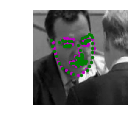

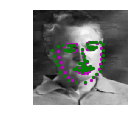

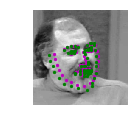

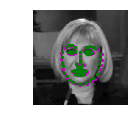

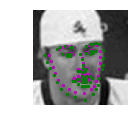

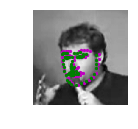

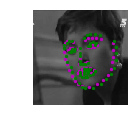

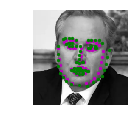

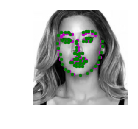

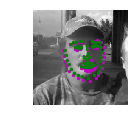

In [24]:
## TODO: visualize your test output
# you can use the same function as before, by un-commenting the line below:

visualize_output(test_images, test_outputs, gt_pts)

Once you've found a good model (or two), save your model so you can load it and use it later!

Save your models but please **delete any checkpoints and saved models before you submit your project** otherwise your workspace may be too large to submit.

In [27]:
## TODO: change the name to something uniqe for each new model
model_dir = 'saved_models/'
model_name = 'keypoints_model_1_myBEST.pt'

# after training, save your model parameters in the dir 'saved_models'
torch.save(net.state_dict(), model_dir+model_name)

After you've trained a well-performing model, answer the following questions so that we have some insight into your training and architecture selection process. Answering all questions is required to pass this project.

### Question 1: What optimization and loss functions did you choose and why?


**Answer**: I used Mean Squared Error function and Adam optimizer. Facial keypoint detection is regression problem,so I can't use SGD etc. That's why I use MSE,because MSE sees large error than L1 Loss Funciton ,because MSE uses square of difference between predictions and ground truth. MSE is more sensitive about errors than L1 or L1Smooth and MSE is more stable than L1. I also trained my model with L1Smooth.However MSE function has more accurately results in my project. I used adam optimizer because Adam has little memory requirements,computationally efficient and appropriate for noisy problems with combining AdaGrad and RMSprop.

### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

**Answer**: I examined two papers (Facial Key Points Detection using Deep Convolutional Neural Network - NaimishNet,Facial keypoints detection using Neural Network) then I created my own (I didn't use ready network architectures from papers) network architecture. My model includes 4 convolutional layers (conv + MaxPooling + ReLu) and 3 fully connected layers. I started 3 conv layers and trained my model with it however later I decided to 4 conv layers. I used dropout layers to avoid overfitting.

### Question 3: How did you decide on the number of epochs and batch_size to train your model?

**Answer**: I set batch_size to 10. Because small batch size reduces overfitting.Also due to my computer specifications, I can't set large batch size. Epoch size is very important. I started with 10 epochs then I trained my network with 350 epochs. So I want to reduce loss value from level of 10^-4 to level of 10^-5 (start loss=0.0025, final loss=0.00016). My loss value decreased every step but same time increased a little/small every step (every batch). However when we looked up in generally the "loss" value gradually decreased. I chose the number of epochs is 350 in order to reach 0.0001 level's loss value. Also I tried with this parameters; batch_size=15 , epochs=300, but this is not more accurately than my main parameters.

## Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, you can see how to extract a single filter (by index) from your first convolutional layer. The filter should appear as a grayscale grid.

[[-0.31263492 -0.03788122 -0.09319376]
 [-0.18417697 -0.19865844 -0.45321   ]
 [ 0.17603284 -0.44278345 -0.29706255]]
(3, 3)


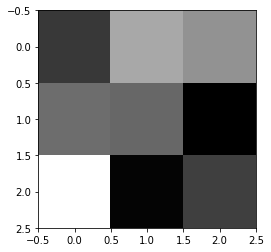

In [25]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
weights1 = net.conv1.weight.data

w = weights1.numpy()

filter_index = 0

print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
plt.imshow(w[filter_index][0], cmap='gray')

## Feature maps

Each CNN has at least one convolutional layer that is composed of stacked filters (also known as convolutional kernels). As a CNN trains, it learns what weights to include in it's convolutional kernels and when these kernels are applied to some input image, they produce a set of **feature maps**. So, feature maps are just sets of filtered images; they are the images produced by applying a convolutional kernel to an input image. These maps show us the features that the different layers of the neural network learn to extract. For example, you might imagine a convolutional kernel that detects the vertical edges of a face or another one that detects the corners of eyes. You can see what kind of features each of these kernels detects by applying them to an image. One such example is shown below; from the way it brings out the lines in an the image, you might characterize this as an edge detection filter.

<img src='images/feature_map_ex.png' width=50% height=50%/>


Next, choose a test image and filter it with one of the convolutional kernels in your trained CNN; look at the filtered output to get an idea what that particular kernel detects.

### TODO: Filter an image to see the effect of a convolutional kernel
---

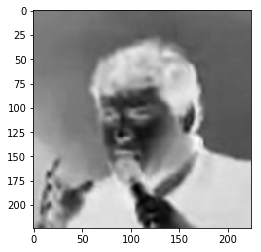

In [26]:
##TODO: load in and display any image from the transformed test dataset
image_for_filt = test_images[5].data   # get the image from it's Variable wrapper
image_for_filt = image_for_filt.numpy()   # convert to numpy array from a Tensor
image_for_filt = np.transpose(image_for_filt, (1, 2, 0))   # transpose to go from torch to numpy image
plt.imshow(np.squeeze(image_for_filt),cmap="gray")
## TODO: Using cv's filter2D function,
import cv2
filtered = cv2.filter2D(image_for_filt,-1,w[filter_index][0])
## apply a specific set of filter weights (like the one displayed above) to the test image
plt.imshow(filtered,cmap="gray")

### Question 4: Choose one filter from your trained CNN and apply it to a test image; what purpose do you think it plays? What kind of feature do you think it detects?


**Answer**: I think this filter detects contrast of objects in the image. In face area of above image,around of eyes,nose and lips features extracted which evident due to contrast.

---
## Moving on!

Now that you've defined and trained your model (and saved the best model), you are ready to move on to the last notebook, which combines a face detector with your saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!